Introduction to Data Analysis

Analyst = Kofi Anane Poku

Linkedin Profile : linkedin.com/in/kofi-poku-anane


TABLE OF CONTENT

Link to Download Dataset

Link : https://drive.google.com/file/d/150y7fURPWn_5hV8dtM5Cu_DBiiQs-hg6/view?usp=drive_link

Link : https://github.com/kananep/datasets/blob/main/COVID-19%20Global%20Statistics%20Dataset.csv

This project consist of the analysis of the Covid-19 dataset .In this analysis, its divided into two fields.


1 . Exploratory Data Analysis (EDA) 


2 . Regression Analysis


Under the Exploratory Data Analysis (EDA),The following analysis where made:
     
     
     1 . Data Cleaning and Manipulation

     2 . Checking Missing Values

     3 . Meta Data Using Transpose T type

     4 . Using Transpose to draw statistical Information

Data Visualization
     
     5 . Categorial Variables analysis

     6 . Question 1 : List of Countries with top death rates in  a sequence manner from highest to lowest

     7 . Question 2: Total number of Population Recovered from covid in each country
     
     8 . Question 3 : Total Covid Cases per country

     9 .  Question 4 : New Cases Recorded Afterward

     10 . Question 5: New Deaths Cases Afterward

     11 . Question 6 : New Recovered cases after the Total recovered cases

     12 .  Question 7: Active Cases Recorded at the present time 

     13 . Question 8: Serious, Critical cases during the covid

     14 . Question 9: Total Cases/1M pop per 1M population (Total Cases Per 1 Million Population) on each country

     15 .  Question 10: Deaths/1M pop (Death Cases Per 1 Million Population) on each country

     16 . Question 11 : Total Test Cases during Covid time

     17 . Question 12 : Test cases per 1 million population (Tests/1M pop)

     18 . Question 13 : Population of each country during Covid Era

     19 .  CONCLUSION ON THE EDA DATA ANALYSIS

     


Under the Regression Analysis , the following analysis were made:

    1 . Correlation

    2 . Simple Linear Regression with scikit-learn
         
         Under Simple Linear Regression with scikit-learn, the analysis follows:
          

          1. Simple Linear Regression 1 (Between Total Cases and Total Deaths)

          2 . Simple Linear Regression 2 (Positive Linear Relationship between the Test/1M pop and Deaths/1M pop) 
          
          3 . Simple Linear Regression 3 (Between Total Deaths and Population)

          4 . CONCLUSION ON REGRESSION ANALYSIS

1 . Exploratory Data Analysis (EDA) 

In [312]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import codecs
import plotly.express as px
import missingno as msno
%matplotlib inline

In [313]:

covid_analysis = pd.read_csv('./COVID-19 Global Statistics Dataset.csv')
covid_analysis


# with codecs.open ('./COVID-19 Global Statistics Dataset.csv', 'r', encoding= 'ISO-8859-1') as f:
#     covid_analysis = pd.read_csv(f)

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,"Serious, Critical",Tot Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Population
0,USA,"111,367,209",NaN,"1,199,031",NaN,"109,053,249",NaN,"1,114,929","1,771","332,633","3,581","1,186,742,917","3,544,577","334,805,269"
1,India,"45,028,429",161,"533,475",2.0,NaN,NaN,NaN,NaN,"32,012",379,"935,879,495","665,334","1,406,631,776"
2,France,"40,138,560",NaN,"167,642",NaN,"39,970,918",NaN,0,NaN,"612,013","2,556","271,490,188","4,139,547","65,584,518"
3,Germany,"38,819,284",574,"182,439",28.0,"38,240,600",NaN,"396,245",NaN,"462,776","2,175","122,332,384","1,458,359","83,883,596"
4,Brazil,"38,407,327",NaN,"709,765",NaN,"36,249,161",NaN,"1,448,401",NaN,"178,345","3,296","63,776,166","296,146","215,353,593"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,Total:,"69,791,773",NaN,"1,365,551",NaN,"66,648,277",NaN,"1,777,945","8,953",NaN,NaN,NaN,NaN,NaN
235,Total:,"14,826,780","1,345","32,665",NaN,"14,572,565",NaN,"221,550",33,NaN,NaN,NaN,NaN,NaN
236,Total:,"12,859,770",NaN,"258,884",NaN,"12,089,899",NaN,"510,987",529,NaN,NaN,NaN,NaN,NaN
237,Total:,721,NaN,15,NaN,706,NaN,0,0,NaN,NaN,NaN,NaN,NaN


In [314]:
cat_cols=covid_analysis.select_dtypes(include=['object']).columns
num_cols = covid_analysis.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['Country', 'Total Cases', 'New Cases', 'Total Deaths',
       'Total Recovered', 'New Recovered', 'Active Cases', 'Serious, Critical',
       'Tot Cases/1M pop', 'Deaths/1M pop', 'Total Tests', 'Tests/1M pop',
       'Population'],
      dtype='object')
Numerical Variables:
['New Deaths']


In [315]:
duplicatedrow = covid_analysis[covid_analysis.duplicated()].shape[0]
if(duplicatedrow == 0):
    print('There is no duplicated row in the csv file')
else:
    print('There is duplicated rows in the csv file')    

There is no duplicated row in the csv file


In [316]:
covid_analysis.isnull().sum()

Country                0
Total Cases            0
New Cases            227
Total Deaths           5
New Deaths           232
Total Recovered       49
New Recovered        222
Active Cases          48
Serious, Critical    179
Tot Cases/1M pop       9
Deaths/1M pop         14
Total Tests           26
Tests/1M pop          26
Population            10
dtype: int64

In [317]:
covid_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            239 non-null    object 
 1   Total Cases        239 non-null    object 
 2   New Cases          12 non-null     object 
 3   Total Deaths       234 non-null    object 
 4   New Deaths         7 non-null      float64
 5   Total Recovered    190 non-null    object 
 6   New Recovered      17 non-null     object 
 7   Active Cases       191 non-null    object 
 8   Serious, Critical  60 non-null     object 
 9   Tot Cases/1M pop   230 non-null    object 
 10  Deaths/1M pop      225 non-null    object 
 11  Total Tests        213 non-null    object 
 12  Tests/1M pop       213 non-null    object 
 13  Population         229 non-null    object 
dtypes: float64(1), object(13)
memory usage: 26.3+ KB


RePlacing NaN with 0

In [318]:
covid_analysis

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,"Serious, Critical",Tot Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Population
0,USA,"111,367,209",NaN,"1,199,031",NaN,"109,053,249",NaN,"1,114,929","1,771","332,633","3,581","1,186,742,917","3,544,577","334,805,269"
1,India,"45,028,429",161,"533,475",2.0,NaN,NaN,NaN,NaN,"32,012",379,"935,879,495","665,334","1,406,631,776"
2,France,"40,138,560",NaN,"167,642",NaN,"39,970,918",NaN,0,NaN,"612,013","2,556","271,490,188","4,139,547","65,584,518"
3,Germany,"38,819,284",574,"182,439",28.0,"38,240,600",NaN,"396,245",NaN,"462,776","2,175","122,332,384","1,458,359","83,883,596"
4,Brazil,"38,407,327",NaN,"709,765",NaN,"36,249,161",NaN,"1,448,401",NaN,"178,345","3,296","63,776,166","296,146","215,353,593"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,Total:,"69,791,773",NaN,"1,365,551",NaN,"66,648,277",NaN,"1,777,945","8,953",NaN,NaN,NaN,NaN,NaN
235,Total:,"14,826,780","1,345","32,665",NaN,"14,572,565",NaN,"221,550",33,NaN,NaN,NaN,NaN,NaN
236,Total:,"12,859,770",NaN,"258,884",NaN,"12,089,899",NaN,"510,987",529,NaN,NaN,NaN,NaN,NaN
237,Total:,721,NaN,15,NaN,706,NaN,0,0,NaN,NaN,NaN,NaN,NaN


In [319]:
covid_analysis['New Cases'] = covid_analysis['New Cases'].fillna(0)
covid_analysis['New Deaths'] = covid_analysis['New Deaths'].fillna(0)
covid_analysis['Total Recovered'] = covid_analysis['Total Recovered'].fillna(0)
covid_analysis['New Recovered'] = covid_analysis['New Recovered'].fillna(0)
covid_analysis['Serious, Critical'] = covid_analysis['Serious, Critical'].fillna(0)
covid_analysis['Tot Cases/1M pop'] = covid_analysis['Tot Cases/1M pop'].fillna(0)
covid_analysis['Deaths/1M pop'] = covid_analysis['Deaths/1M pop'].fillna(0)
covid_analysis['Total Tests'] = covid_analysis['Total Tests'].fillna(0)
covid_analysis['Tests/1M pop'] = covid_analysis['Tests/1M pop'].fillna(0)
covid_analysis['Population'] = covid_analysis['Population'].fillna(0)
covid_analysis['Active Cases'] = covid_analysis['Active Cases'].fillna(0)

Renaming Column

In [320]:
covid_analysis.rename(columns={'Tot Cases/1M pop' : 'Total Cases/1M pop'} , inplace=True)

RePlacing commas in numbers with empty and converting object(string) to integer to be workable with

In [321]:
covid_analysis.dtypes

Country                object
Total Cases            object
New Cases              object
Total Deaths           object
New Deaths            float64
Total Recovered        object
New Recovered          object
Active Cases           object
Serious, Critical      object
Total Cases/1M pop     object
Deaths/1M pop          object
Total Tests            object
Tests/1M pop           object
Population             object
dtype: object

In [322]:
covid_analysis['Total Deaths'] = covid_analysis['Total Deaths'].str.replace(',','')
covid_analysis['Total Deaths'] =  covid_analysis['Total Deaths'].astype('Int64')
covid_analysis['Total Cases'] = covid_analysis['Total Cases'].str.replace(',','')
covid_analysis['Total Cases'] =  covid_analysis['Total Cases'].astype('Int64')
covid_analysis['New Cases'] = covid_analysis['New Cases'].str.replace(',','')
covid_analysis['New Cases'] =  covid_analysis['New Cases'].astype('Int64')
covid_analysis['Total Recovered'] = covid_analysis['Total Recovered'].str.replace(',','')
covid_analysis['Total Recovered'] =  covid_analysis['Total Recovered'].astype('Int64')
covid_analysis['New Recovered'] = covid_analysis['New Recovered'].str.replace(',','')
covid_analysis['New Recovered'] =  covid_analysis['New Recovered'].astype('Int64')
covid_analysis['Active Cases'] = covid_analysis['Active Cases'].str.replace(',','')
covid_analysis['Active Cases'] =  covid_analysis['Active Cases'].astype('Int64')
covid_analysis['Serious, Critical'] = covid_analysis['Serious, Critical'].str.replace(',','')
covid_analysis['Serious, Critical'] =  covid_analysis['Serious, Critical'].astype('Int64')
covid_analysis['Deaths/1M pop'] = covid_analysis['Deaths/1M pop'].str.replace(',','')
#covid_analysis['Deaths/1M pop'] =  covid_analysis['Deaths/1M pop'].astype('Int64')
covid_analysis['Total Tests'] = covid_analysis['Total Tests'].str.replace(',','')
covid_analysis['Total Tests'] =  covid_analysis['Total Tests'].astype('Int64')
covid_analysis['Tests/1M pop'] = covid_analysis['Tests/1M pop'].str.replace(',','')
#covid_analysis['Tests/1M pop'] =  covid_analysis['Tests/1M pop'].astype('int64')
covid_analysis['Population'] = covid_analysis['Population'].str.replace(',','')
covid_analysis['Population'] =  covid_analysis['Population'].astype('Int64')
covid_analysis['Total Cases/1M pop'] = covid_analysis['Total Cases/1M pop'].str.replace(',','')
#covid_analysis['Total Cases/1M pop'] =  covid_analysis['Total Cases/1M pop'].astype('Int64')

In [323]:
covid_analysis.dtypes

Country                object
Total Cases             Int64
New Cases               Int64
Total Deaths            Int64
New Deaths            float64
Total Recovered         Int64
New Recovered           Int64
Active Cases            Int64
Serious, Critical       Int64
Total Cases/1M pop     object
Deaths/1M pop          object
Total Tests             Int64
Tests/1M pop           object
Population              Int64
dtype: object

RePlacing Nan Values with 0 again because float numbers are mixed with integers in the dataset

In [324]:
covid_analysis['New Cases'] = covid_analysis['New Cases'].fillna(0)
covid_analysis['New Deaths'] = covid_analysis['New Deaths'].fillna(0)
covid_analysis['Total Recovered'] = covid_analysis['Total Recovered'].fillna(0)
covid_analysis['New Recovered'] = covid_analysis['New Recovered'].fillna(0)
covid_analysis['Serious, Critical'] = covid_analysis['Serious, Critical'].fillna(0)
covid_analysis['Total Cases/1M pop'] = covid_analysis['Total Cases/1M pop'].fillna(0)
covid_analysis['Deaths/1M pop'] = covid_analysis['Deaths/1M pop'].fillna(0)
covid_analysis['Total Tests'] = covid_analysis['Total Tests'].fillna(0)
covid_analysis['Tests/1M pop'] = covid_analysis['Tests/1M pop'].fillna(0)
covid_analysis['Population'] = covid_analysis['Population'].fillna(0)
covid_analysis['Active Cases'] = covid_analysis['Active Cases'].fillna(0)

In [325]:
covid_analysis

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,"Serious, Critical",Total Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Population
0,USA,111367209,0,1199031,0.0,109053249,0,1114929,1771,332633,3581,1186742917,3544577,334805269
1,India,45028429,161,533475,2.0,0,0,0,0,32012,379,935879495,665334,1406631776
2,France,40138560,0,167642,0.0,39970918,0,0,0,612013,2556,271490188,4139547,65584518
3,Germany,38819284,574,182439,28.0,38240600,0,396245,0,462776,2175,122332384,1458359,83883596
4,Brazil,38407327,0,709765,0.0,36249161,0,1448401,0,178345,3296,63776166,296146,215353593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,Total:,69791773,0,1365551,0.0,66648277,0,1777945,8953,0,0,0,0,0
235,Total:,14826780,1345,32665,0.0,14572565,0,221550,33,0,0,0,0,0
236,Total:,12859770,0,258884,0.0,12089899,0,510987,529,0,0,0,0,0
237,Total:,721,0,15,0.0,706,0,0,0,0,0,0,0,0


In [326]:
covid_analysis['New Deaths'] = covid_analysis['New Deaths'].astype('Int64')
covid_analysis


,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,"Serious, Critical",Total Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Population
0,USA,111367209,0,1199031,0,109053249,0,1114929,1771,332633,3581,1186742917,3544577,334805269
1,India,45028429,161,533475,2,0,0,0,0,32012,379,935879495,665334,1406631776
2,France,40138560,0,167642,0,39970918,0,0,0,612013,2556,271490188,4139547,65584518
3,Germany,38819284,574,182439,28,38240600,0,396245,0,462776,2175,122332384,1458359,83883596
4,Brazil,38407327,0,709765,0,36249161,0,1448401,0,178345,3296,63776166,296146,215353593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,Total:,69791773,0,1365551,0,66648277,0,1777945,8953,0,0,0,0,0
235,Total:,14826780,1345,32665,0,14572565,0,221550,33,0,0,0,0,0
236,Total:,12859770,0,258884,0,12089899,0,510987,529,0,0,0,0,0
237,Total:,721,0,15,0,706,0,0,0,0,0,0,0,0


Saving Clean Data

In [327]:
#covid_analysis.to_csv('covid_analysis.csv')

Checking missing  Values in the dataset

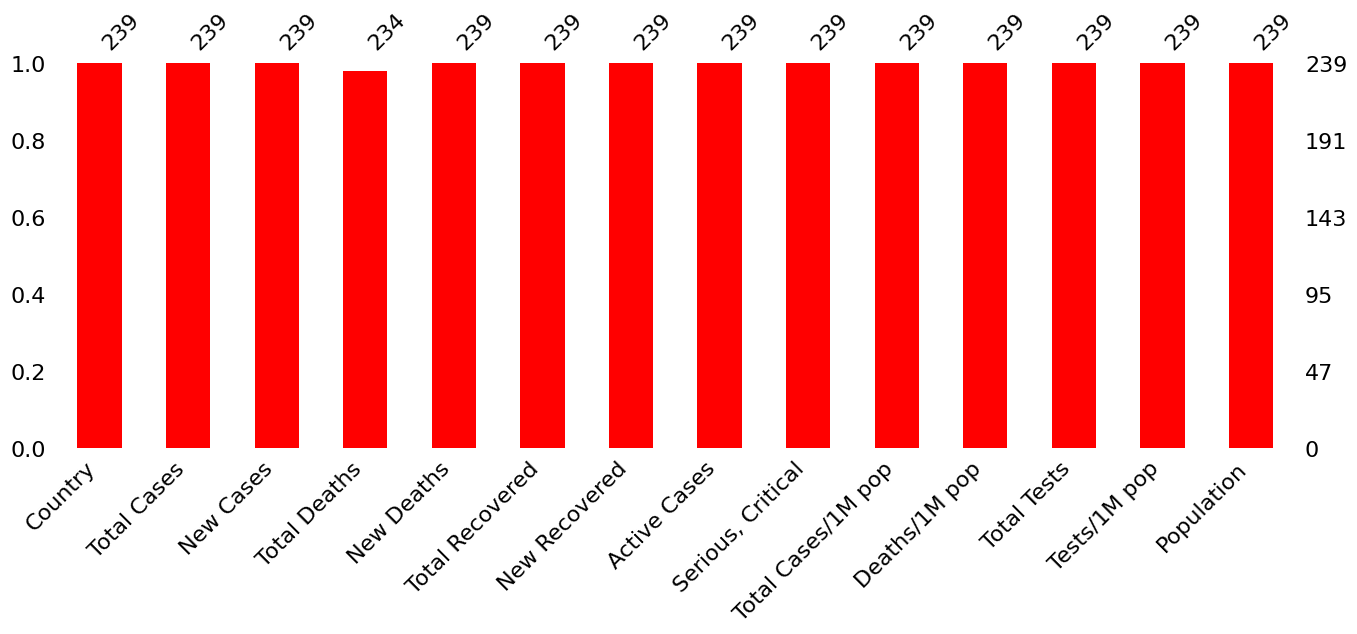

In [328]:
msno.bar(covid_analysis, figsize = (16,5),color = 'red')
plt.show()

The graph shows 5 values are missing in the Total Deaths Column from the dataset

Meta information Using Transpose T type

In [329]:
covid_analysis.T

,0,1,2,3,4,5,6,7,8,9,...,229,230,231,232,233,234,235,236,237,238
Country,USA,India,France,Germany,Brazil,S. Korea,Japan,Italy,UK,Russia,...,MS Zaandam,China,Total:,Total:,Total:,Total:,Total:,Total:,Total:,Total:
Total Cases,111367209,45028429,40138560,38819284,38407327,34571873,33803572,26716804,24898914,23957146,...,9,503302,131413625,221452228,253186231,69791773,14826780,12859770,721,703531128
New Cases,0,161,0,574,0,0,0,0,0,0,...,0,0,0,161,940,0,1345,0,0,2446
Total Deaths,1199031,533475,167642,182439,709765,35934,74694,196257,232112,402264,...,2,5272,1674775,1553005,2100109,1365551,32665,258884,15,6985004
New Deaths,0,2,0,28,0,0,0,0,0,0,...,0,0,0,2,35,0,0,0,0,37
Total Recovered,109053249,0,39970918,38240600,36249161,34535939,0,26347863,24655170,23370779,...,7,379053,126866566,205616782,248509042,66648277,14572565,12089899,706,674303837
New Recovered,0,0,0,0,0,0,0,0,0,0,...,0,0,0,583,2477,0,0,0,0,5178
Active Cases,1114929,0,0,396245,1448401,0,0,172684,11632,184103,...,0,118977,2872284,14282441,2577080,1777945,221550,510987,0,22242287
"Serious, Critical",1771,0,0,0,0,0,0,67,0,0,...,0,0,6926,14733,4521,8953,33,529,0,35695
Total Cases/1M pop,332633,32012,612013,462776,178345,673523,269169,443338,363499,164308,...,0,347,0,0,0,0,0,0,0,90256.50


Using Transpose to draw statistical information

In [330]:
covid_analysis.describe().T.style.bar(subset=["mean"],color='red').background_gradient(subset=['std'],cmap='BuPu').background_gradient(subset=['50%'],cmap='Accent')

,count,mean,std,min,25%,50%,75%,max
Total Cases,239.000000,8830934.661088,51738486.560720,9.000000,26366.000000,230354.000000,1548522.000000,703531128.000000
New Cases,239.000000,30.702929,211.966740,0.000000,0.000000,0.000000,0.000000,2446.000000
Total Deaths,234.000000,89551.333333,513249.123734,1.000000,225.000000,2459.500000,17825.750000,6985004.000000
New Deaths,239.000000,0.464435,3.763741,0.000000,0.000000,0.000000,0.000000,37.000000
Total Recovered,239.000000,7934014.305439,49580817.010701,0.000000,2189.500000,62471.000000,1141890.000000,674303837.000000
New Recovered,239.000000,55.485356,402.784602,0.000000,0.000000,0.000000,0.000000,5178.000000
Active Cases,239.000000,211637.995816,1728545.068373,-1.000000,0.000000,168.000000,3755.000000,22242287.000000
"Serious, Critical",239.000000,314.510460,2608.855444,0.000000,0.000000,0.000000,0.000000,35695.000000
Total Tests,239.000000,29393302.589958,113595098.787419,0.000000,180433.000000,1499795.000000,11484784.000000,1186742917.000000
Population,239.000000,33242406.405858,135872081.596987,0.000000,318000.500000,5323993.000000,20827301.500000,1448471400.000000


The red bar in the mean shows the bar standard for each column mean calculations , and other color in the standard deviation(std) column and the 50 percent column

Data Visualization

Categorial Variables analysis

In [331]:
cat_cols=covid_analysis.select_dtypes(include=['object']).columns
num_cols = covid_analysis.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['Country', 'Total Cases/1M pop', 'Deaths/1M pop', 'Tests/1M pop'], dtype='object')
Numerical Variables:
['Total Cases', 'New Cases', 'Total Deaths', 'New Deaths', 'Total Recovered', 'New Recovered', 'Active Cases', 'Serious, Critical', 'Total Tests', 'Population']


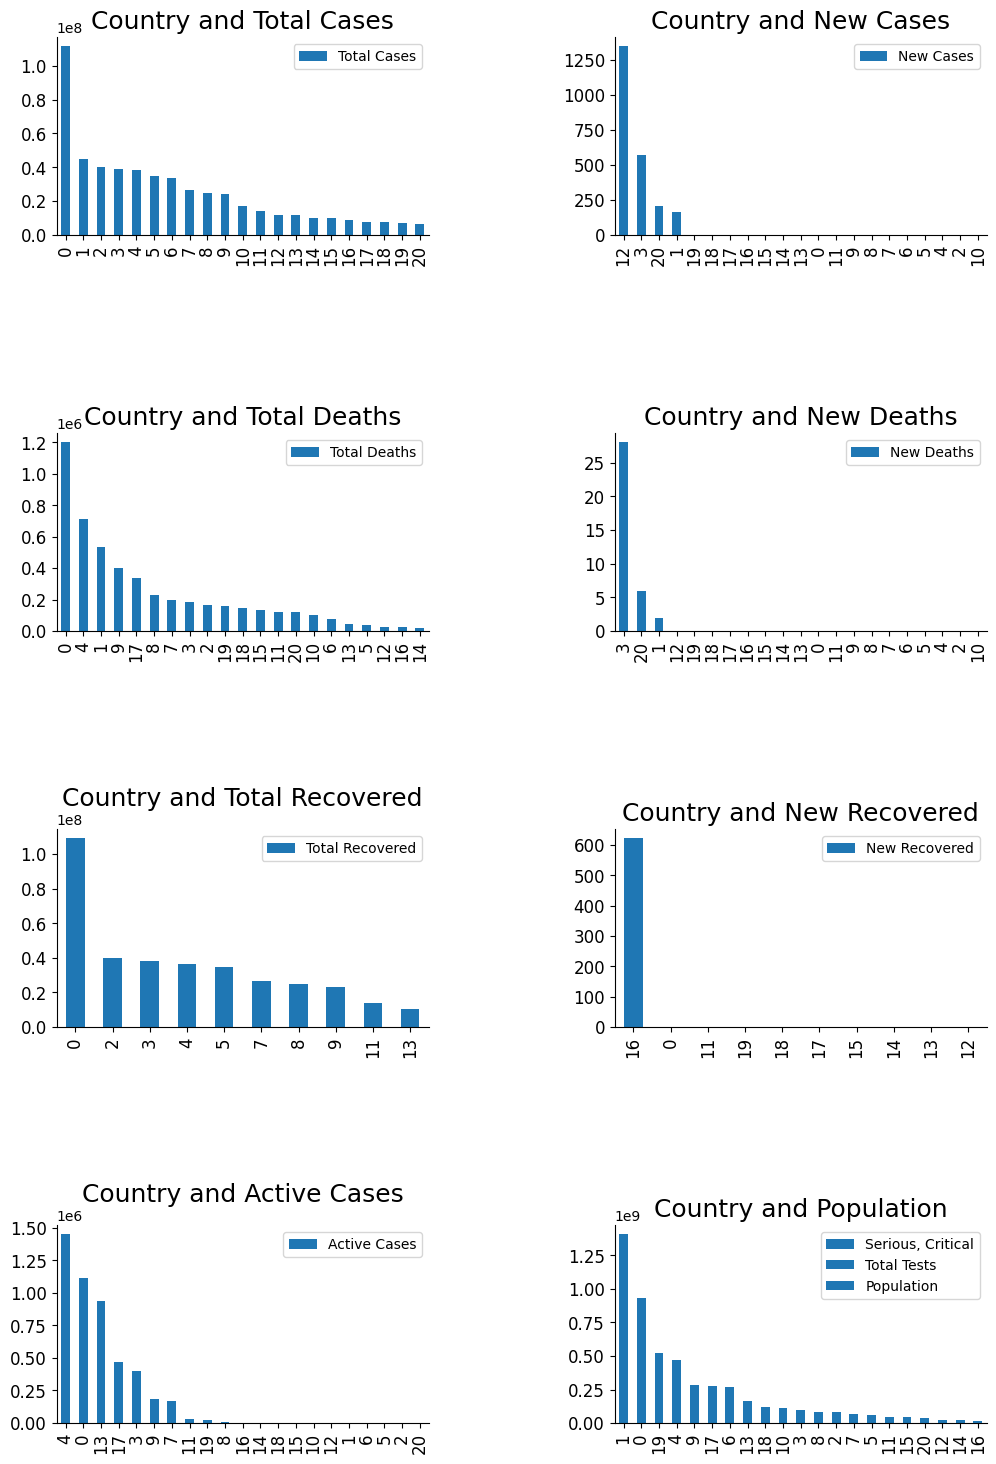

In [332]:
fig, axarr = plt.subplots(4, 2, figsize=(12, 18))
covid_analysis[['Country','Total Cases']][0:21].sort_values(by='Total Cases',ascending=False).plot.bar(ax=axarr[0][0], fontsize=12)
axarr[0][0].set_title("Country and Total Cases", fontsize=18)
covid_analysis[['Country','New Cases']][0:21].sort_values(by='New Cases',ascending=False).plot.bar(ax=axarr[0][1], fontsize=12)
axarr[0][1].set_title("Country and New Cases", fontsize=18)
covid_analysis[['Country','Total Deaths']][0:21].sort_values(by='Total Deaths',ascending=False).plot.bar(ax=axarr[1][0], fontsize=12)
axarr[1][0].set_title("Country and Total Deaths", fontsize=18)
covid_analysis[['Country','New Deaths']][0:21].sort_values(by='New Deaths',ascending=False).plot.bar(ax=axarr[1][1], fontsize=12)
axarr[1][1].set_title("Country and New Deaths", fontsize=18)
covid_analysis[['Country','Total Recovered']][0:21].sort_values(by='Total Recovered',ascending=False).head(10).plot.bar(ax=axarr[2][0], fontsize=12)
axarr[2][0].set_title("Country and Total Recovered", fontsize=18)
covid_analysis[['Country','New Recovered']][0:21].sort_values(by='New Recovered',ascending=False).head(10).plot.bar(ax=axarr[2][1], fontsize=12)
axarr[2][1].set_title("Country and New Recovered", fontsize=18)
covid_analysis[['Country','Active Cases']][0:21].sort_values(by='Active Cases',ascending=False).plot.bar(ax=axarr[3][0], fontsize=12)
axarr[3][0].set_title("Country and Active Cases", fontsize=18)
covid_analysis[['Country','Serious, Critical']][0:21].sort_values(by='Serious, Critical',ascending=False).plot.bar(ax=axarr[3][1], fontsize=12)
axarr[3][1].set_title("Country and Serious, Critical", fontsize=18)
#covid_analysis[['Country','Total Cases/1M pop']][0:21].sort_values(by='Total Cases/1M pop',ascending=False).plot.bar(ax=axarr[3][1], fontsize=12)
#axarr[3][1].set_title("Country and Total Cases/1M pop", fontsize=18)
#covid_analysis[['Country','Deaths/1M pop']][0:21].sort_values(by='Deaths/1M pop',ascending=False).plot.bar(ax=axarr[3][1], fontsize=12)
#axarr[3][1].set_title("Country and Deaths/1M pop", fontsize=18)
covid_analysis[['Country','Total Tests']][0:21].sort_values(by='Total Tests',ascending=False).plot.bar(ax=axarr[3][1], fontsize=12)
axarr[3][1].set_title("Country and Total Tests", fontsize=18)
covid_analysis[['Country','Population']][0:21].sort_values(by='Population',ascending=False).plot.bar(ax=axarr[3][1], fontsize=12)
axarr[3][1].set_title("Country and Population", fontsize=18)
plt.subplots_adjust(hspace=1.0)
plt.subplots_adjust(wspace=.5)
sns.despine()






This is a little summary of the categorial variable analysis to give you a whole idea how the analysis is about. Deep analysis is made under the chart analysis that follows 


Question 1 : List of Countries with top death rates in a sequence manner from highest to lowest

In [333]:
totaldeath = covid_analysis[['Country','Total Deaths']]
totaldeath = totaldeath[:231]
totaldeath

,Country,Total Deaths
0,USA,1199031
1,India,533475
2,France,167642
3,Germany,182439
4,Brazil,709765
...,...,...
226,Tokelau,<NA>
227,Vatican City,<NA>
228,Western Sahara,1
229,MS Zaandam,2


In [334]:
totaldeath['Total Deaths'] = totaldeath['Total Deaths'].fillna(0)
totaldeath.isnull().sum()

Country         0
Total Deaths    0
dtype: int64

In [335]:
totaldeath = totaldeath[['Country','Total Deaths']][0:21].sort_values(by='Total Deaths',ascending=False)
totaldeath

,Country,Total Deaths
0,USA,1199031
4,Brazil,709765
1,India,533475
9,Russia,402264
17,Mexico,334958
8,UK,232112
7,Italy,196257
3,Germany,182439
2,France,167642
19,Indonesia,162033


In [336]:
totaldeath.dtypes

Country         object
Total Deaths     Int64
dtype: object

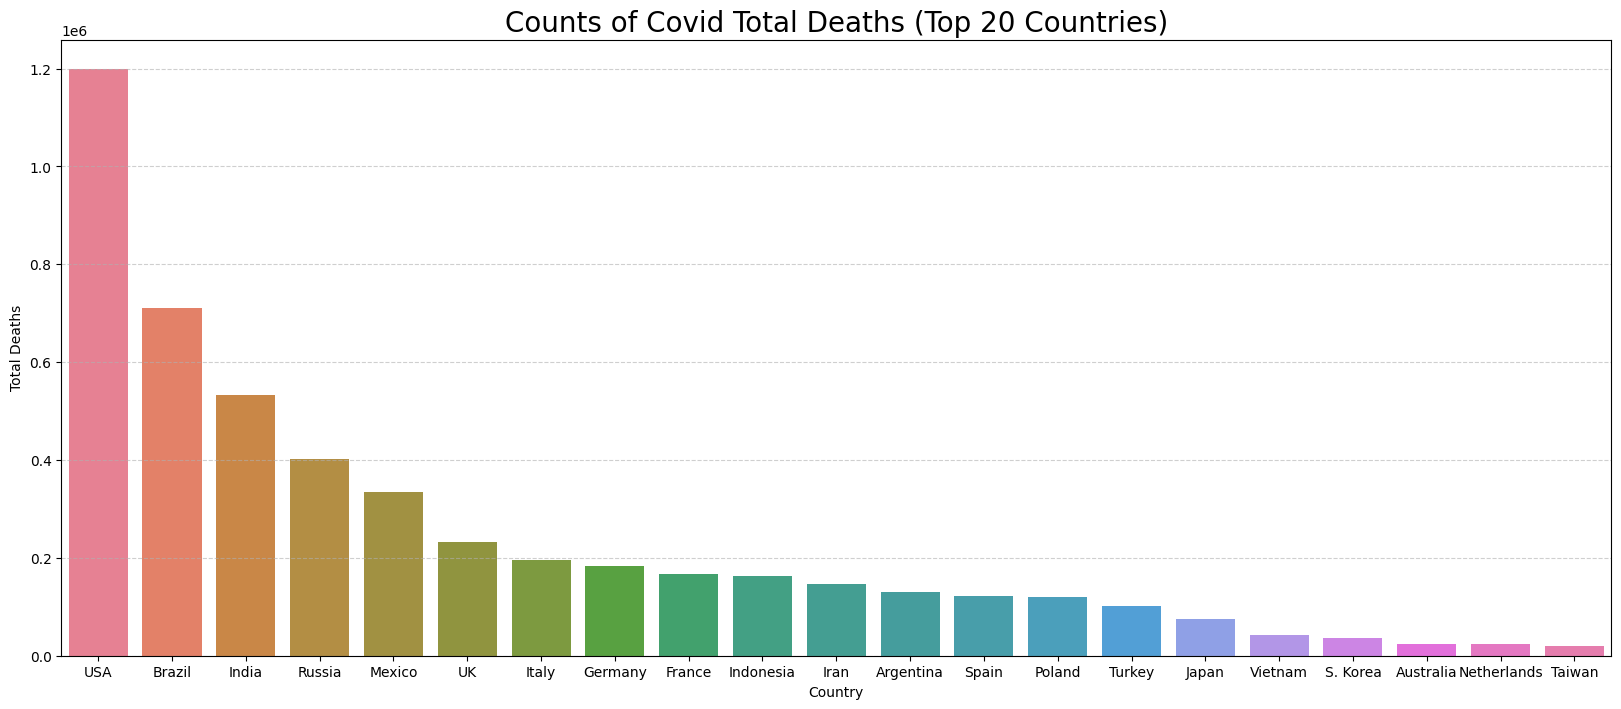

In [337]:
plt.figure(figsize=(20,8))
sns.barplot(data=totaldeath , x = 'Country' , y='Total Deaths' , hue='Country')
plt.title("Counts of Covid Total Deaths (Top 20 Countries)", fontsize = 20)
plt.grid(axis='y', linestyle='--',alpha=0.6)
plt.show()


During the covid 19 season , it is recorded that USA was the country with the highest death rate according to the bar graph , followed by Brazil and the sequence follows.

Question 2: Total number of Population Recovered from covid in each country

In [338]:
covid_analysis[['Country','Total Recovered']][:231].sort_values(by='Total Recovered' , ascending=False)


,Country,Total Recovered
0,USA,109053249
2,France,39970918
3,Germany,38240600
4,Brazil,36249161
5,S. Korea,34535939
...,...,...
132,Malawi,0
122,Jamaica,0
1,India,0
113,Iceland,0


In [339]:
totalrecovered = covid_analysis[['Country','Total Recovered']][:20].sort_values(by='Total Recovered' , ascending=False)
totalrecovered


,Country,Total Recovered
0,USA,109053249
2,France,39970918
3,Germany,38240600
4,Brazil,36249161
5,S. Korea,34535939
7,Italy,26347863
8,UK,24655170
9,Russia,23370779
11,Spain,13762417
13,Vietnam,10640971


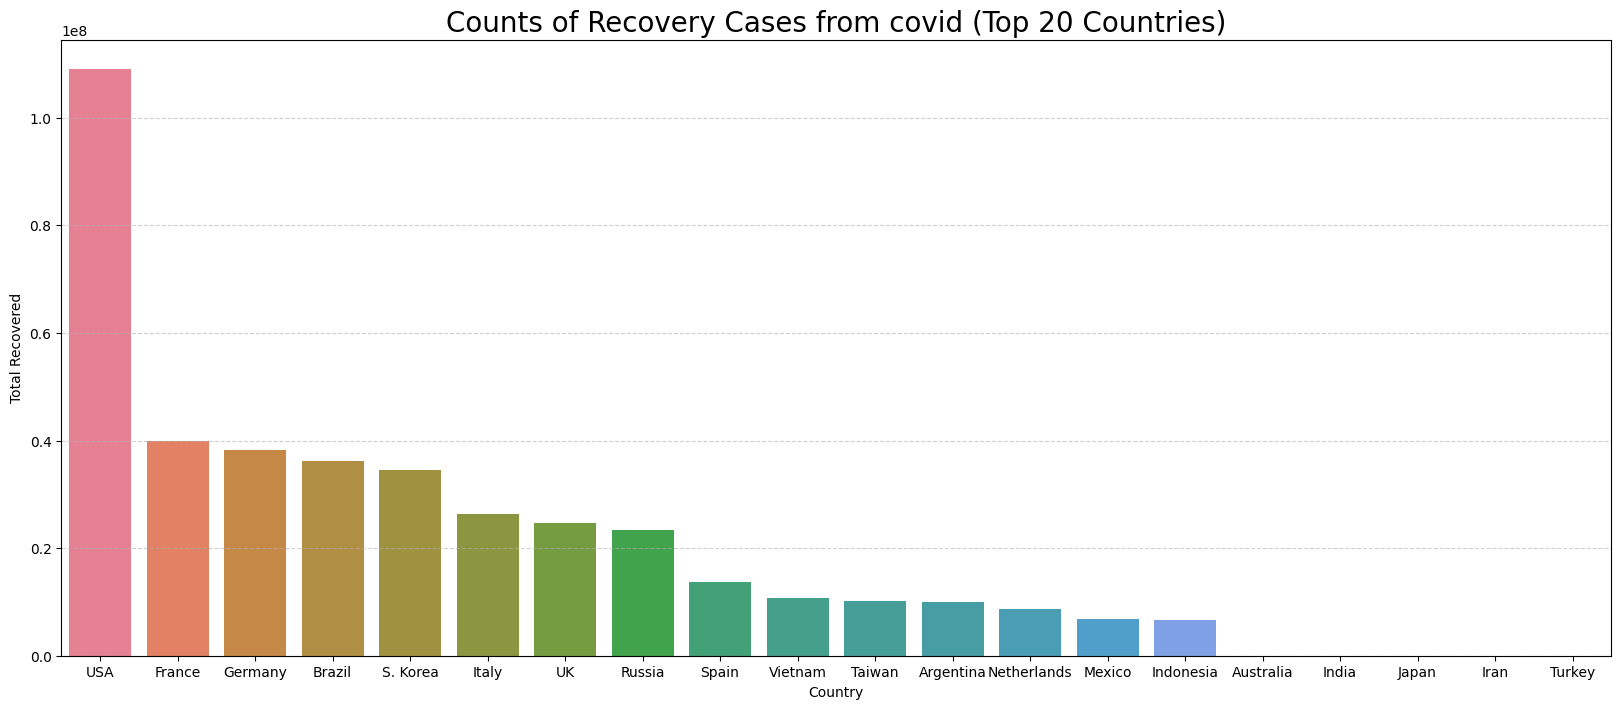

In [340]:
plt.figure(figsize=(20,8))
sns.barplot(data=totalrecovered , x = 'Country',y='Total Recovered' , hue='Country')
plt.title("Counts of Recovery Cases from covid (Top 20 Countries)", fontsize = 20)
plt.grid(axis='y', linestyle='--',alpha=0.6)
plt.show()

Graph representing USA as most recovered cases from Covid. This is a Statiscal analysis that shows that USA was the most affected country with covid and most recovered country of the covid cases

While in Australia , India , Japan , Iran and Turkey , they were none values of recovered cases from covid been recorded

Question 3 : Total Covid Cases per country

In [341]:
covid_analysis[['Country','Total Cases']][:231].sort_values(by='Total Cases' , ascending=False)

,Country,Total Cases
0,USA,111367209
1,India,45028429
2,France,40138560
3,Germany,38819284
4,Brazil,38407327
...,...,...
225,Diamond Princess,712
226,Tokelau,80
227,Vatican City,29
228,Western Sahara,10


In [342]:
totalcases = covid_analysis[['Country','Total Cases']][:21].sort_values(by='Total Cases' , ascending=False)
totalcases

,Country,Total Cases
0,USA,111367209
1,India,45028429
2,France,40138560
3,Germany,38819284
4,Brazil,38407327
5,S. Korea,34571873
6,Japan,33803572
7,Italy,26716804
8,UK,24898914
9,Russia,23957146


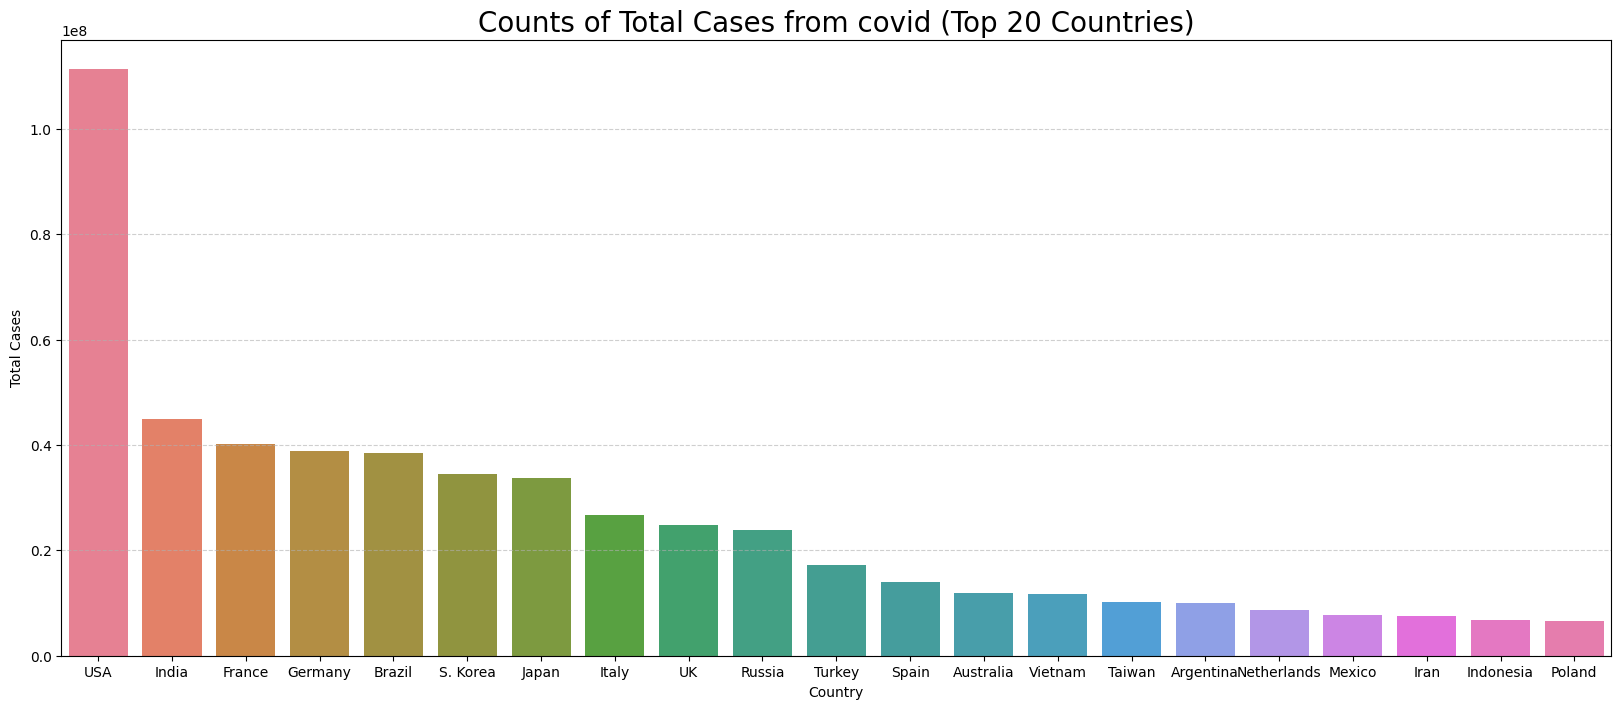

In [343]:
plt.figure(figsize=(20,8))
sns.barplot(data=totalcases , x = 'Country',y='Total Cases' , hue='Country')
plt.title("Counts of Total Cases from covid (Top 20 Countries)", fontsize = 20)
plt.grid(axis='y', linestyle='--',alpha=0.6)
plt.show()

USA is still leading the Statistic process with the most count of total cases of covid . Lets Follow to the end and see what information can be drawn from this

Question 4 : New Cases Recorded Afterward

In [344]:
covid_analysis[['Country','New Cases']][:231].sort_values(by='New Cases' , ascending=False)

,Country,New Cases
12,Australia,1345
3,Germany,574
20,Poland,210
1,India,161
56,Lithuania,77
...,...,...
85,Estonia,0
86,Palestine,0
87,Venezuela,0
88,Egypt,0


In [345]:
newcases = covid_analysis[['Country','New Cases']][:21].sort_values(by='New Cases' , ascending=False)
newcases

,Country,New Cases
12,Australia,1345
3,Germany,574
20,Poland,210
1,India,161
19,Indonesia,0
18,Iran,0
17,Mexico,0
16,Netherlands,0
15,Argentina,0
14,Taiwan,0


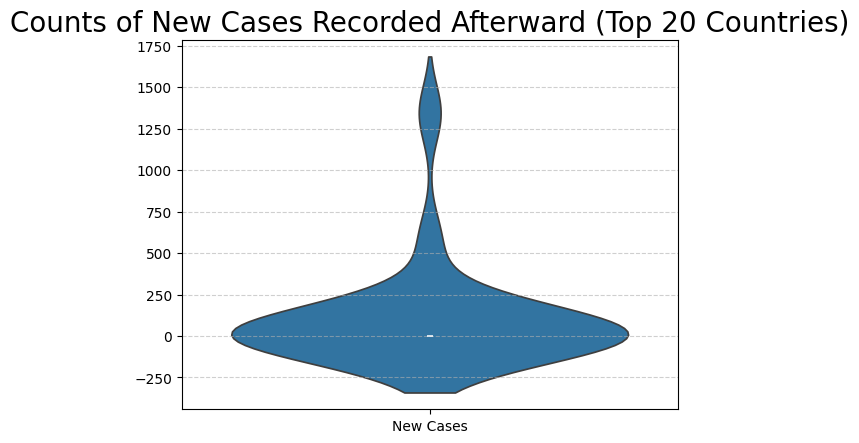

In [346]:

sns.violinplot(data=newcases)
plt.title("Counts of New Cases Recorded Afterward (Top 20 Countries)", fontsize = 20)
plt.grid(axis='y', linestyle='--',alpha=0.6)


To explain the violin graph , the density is dense towards the 0 number at the y axis which means most of the world countries recorded no cases afterward.

Between 1500 and 1250 number at the y axis , most countries recorded cases

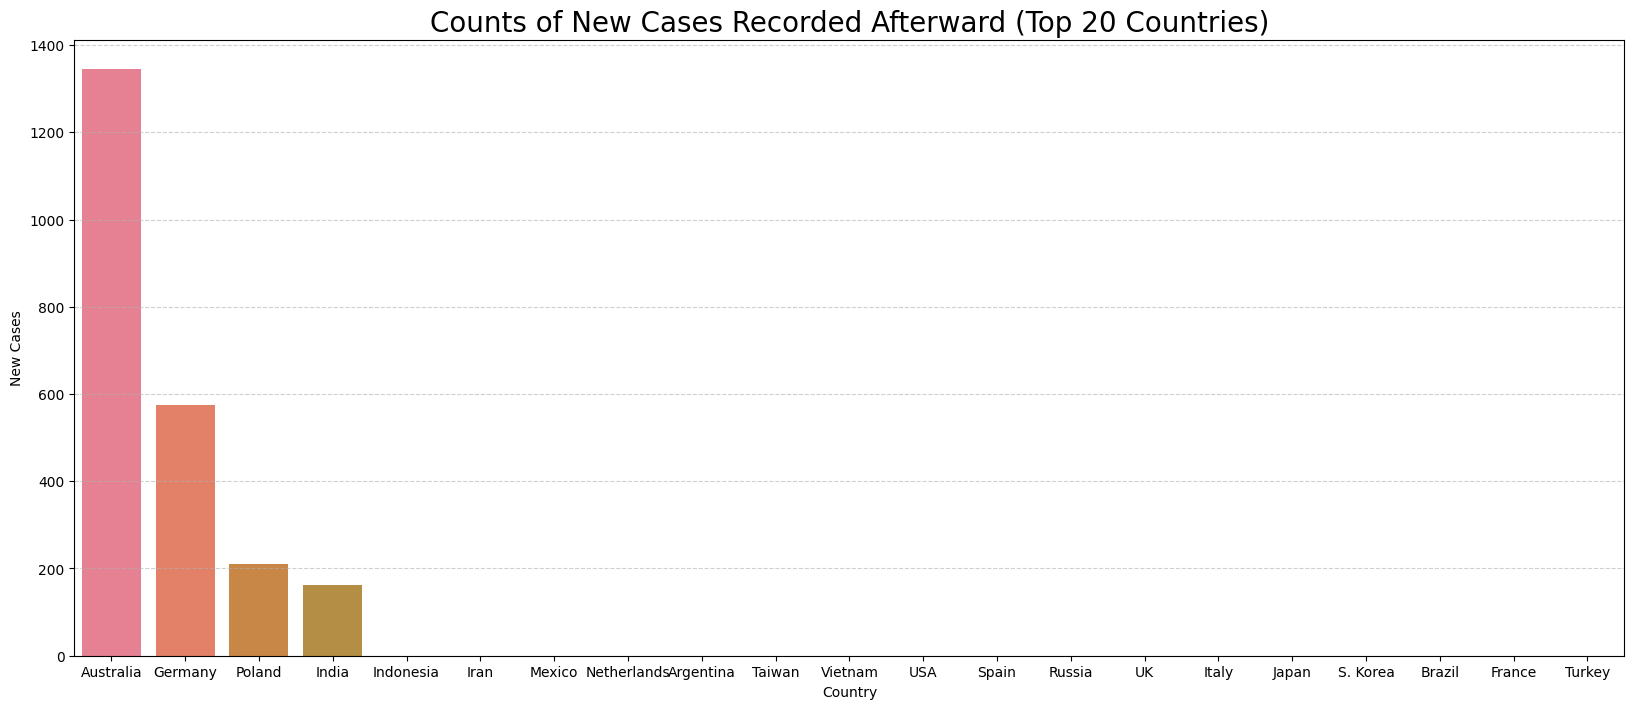

In [347]:
plt.figure(figsize=(20,8))
sns.barplot(data=newcases , x = 'Country',y='New Cases' , hue='Country')
plt.title("Counts of New Cases Recorded Afterward (Top 20 Countries)", fontsize = 20)
plt.grid(axis='y', linestyle='--',alpha=0.6)
plt.show()

This bar graph continues the explaination of the violin graph ,this shows that Australia , Germany , Poland and India recorded new covid cases afterward

Question 5: New Deaths Cases Afterward

In [348]:
newdeaths = covid_analysis[['Country','New Deaths']][:231].sort_values(by='New Deaths' , ascending=False)
newdeaths

,Country,New Deaths
3,Germany,28
20,Poland,6
1,India,2
58,Bulgaria,1
159,Guinea,0
...,...,...
82,Kuwait,0
83,Myanmar,0
84,Moldova,0
85,Estonia,0


In [349]:
newdeaths = newdeaths[:21]
newdeaths

,Country,New Deaths
3,Germany,28
20,Poland,6
1,India,2
58,Bulgaria,1
159,Guinea,0
148,Burundi,0
149,Seychelles,0
150,Gabon,0
151,Andorra,0
152,Papua New Guinea,0


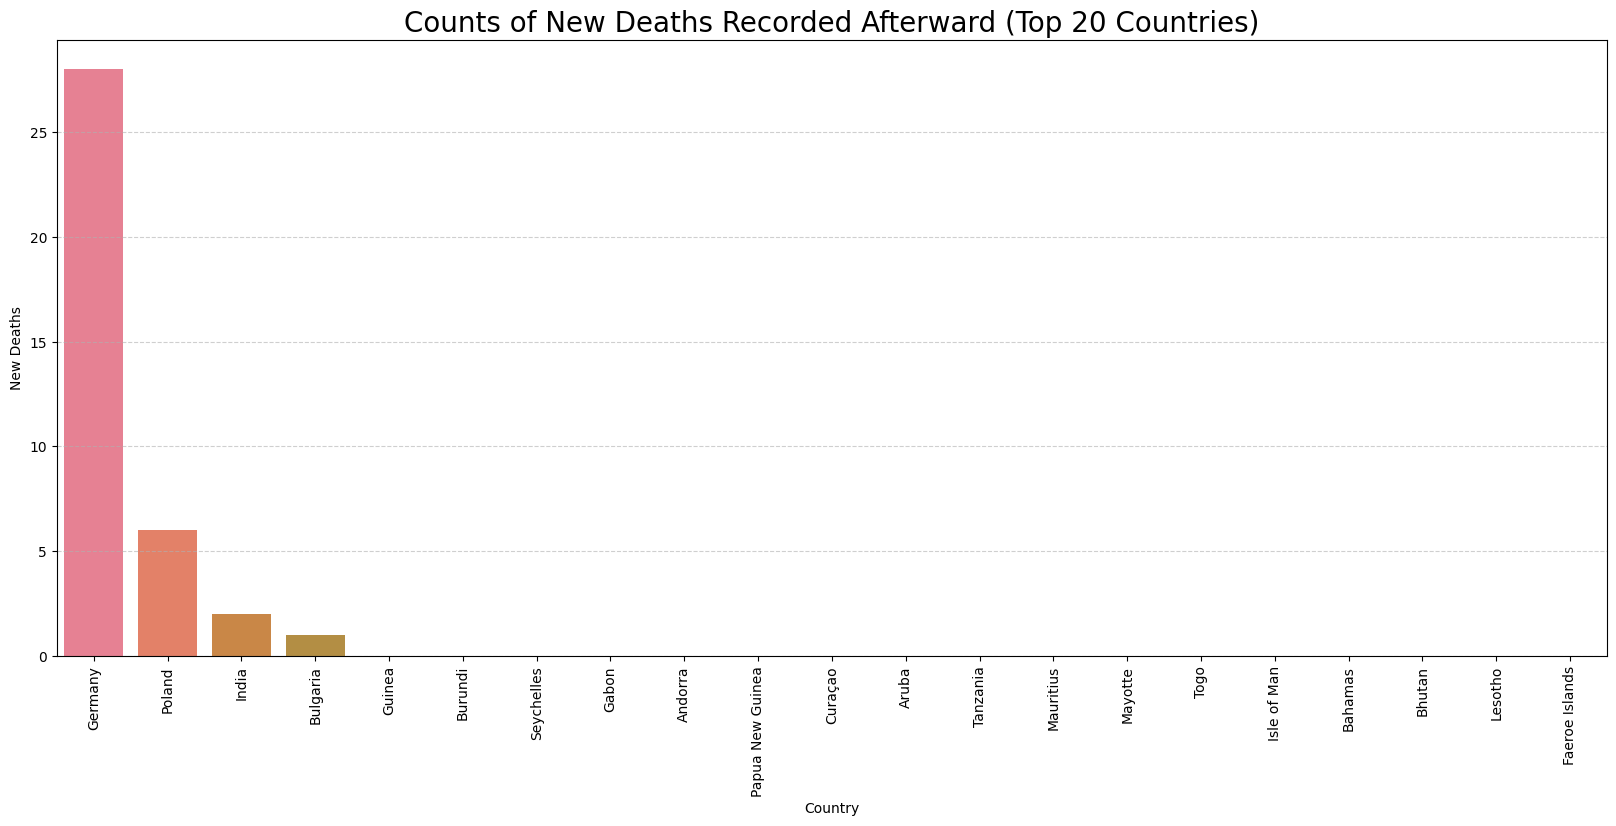

In [350]:
plt.figure(figsize=(20,8))
sns.barplot(data=newdeaths , x = 'Country',y='New Deaths' , hue='Country')
plt.title("Counts of New Deaths Recorded Afterward (Top 20 Countries)", fontsize = 20)
plt.grid(axis='y', linestyle='--',alpha=0.6)
plt.xticks(rotation=90)
plt.show()

Germany recorded new deaths cases afterward,followed by Poland ,India and Bulgaria

Question 6 : New Recovered cases after the Total recovered cases

In [351]:
newrecovered = covid_analysis[['Country','New Recovered']][:231].sort_values(by='New Recovered' , ascending=False)
newrecovered

,Country,New Recovered
28,Canada,2116
35,Switzerland,816
16,Netherlands,622
43,Serbia,536
40,Singapore,428
...,...,...
89,Qatar,0
90,Libya,0
91,Ethiopia,0
92,Réunion,0


In [352]:
newrecovered = newrecovered[:21]
newrecovered

,Country,New Recovered
28,Canada,2116
35,Switzerland,816
16,Netherlands,622
43,Serbia,536
40,Singapore,428
29,Belgium,168
56,Lithuania,154
33,Czechia,73
42,Sweden,36
53,Finland,27


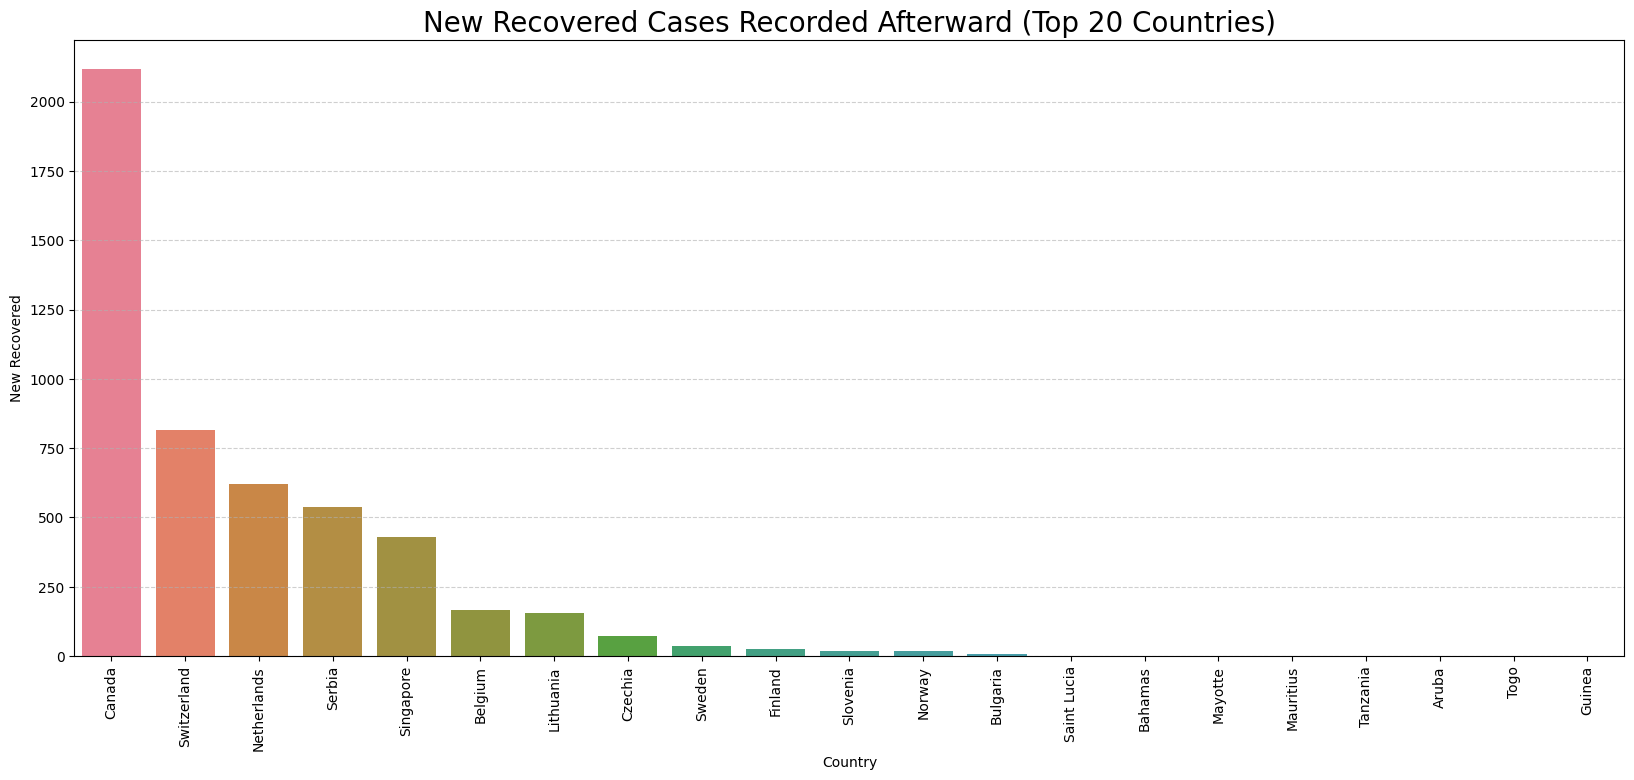

In [353]:
plt.figure(figsize=(20,8))
sns.barplot(data=newrecovered , x = 'Country',y='New Recovered' , hue='Country')
plt.title("New Recovered Cases Recorded Afterward (Top 20 Countries)", fontsize = 20)
plt.grid(axis='y', linestyle='--',alpha=0.6)
plt.xticks(rotation=90)
plt.show()

The graph shows Canada with top list of new recovered cases recorded afterwards , followed by Switzerland , Netherlands , Serbia , Singapore and the sequence follows

Question 7: Active Cases Recorded at the present time 

In [354]:
activecases = covid_analysis[['Country','Active Cases']][:231].sort_values(by='Active Cases' , ascending=False)
activecases

,Country,Active Cases
4,Brazil,1448401
0,USA,1114929
13,Vietnam,939937
17,Mexico,467986
3,Germany,396245
...,...,...
170,Micronesia,0
15,Argentina,0
97,Luxembourg,0
25,Ukraine,0


In [355]:
activecases = activecases[:21]
activecases

,Country,Active Cases
4,Brazil,1448401
0,USA,1114929
13,Vietnam,939937
17,Mexico,467986
3,Germany,396245
9,Russia,184103
7,Italy,172684
62,Lebanon,145299
230,China,118977
101,Brunei,98976


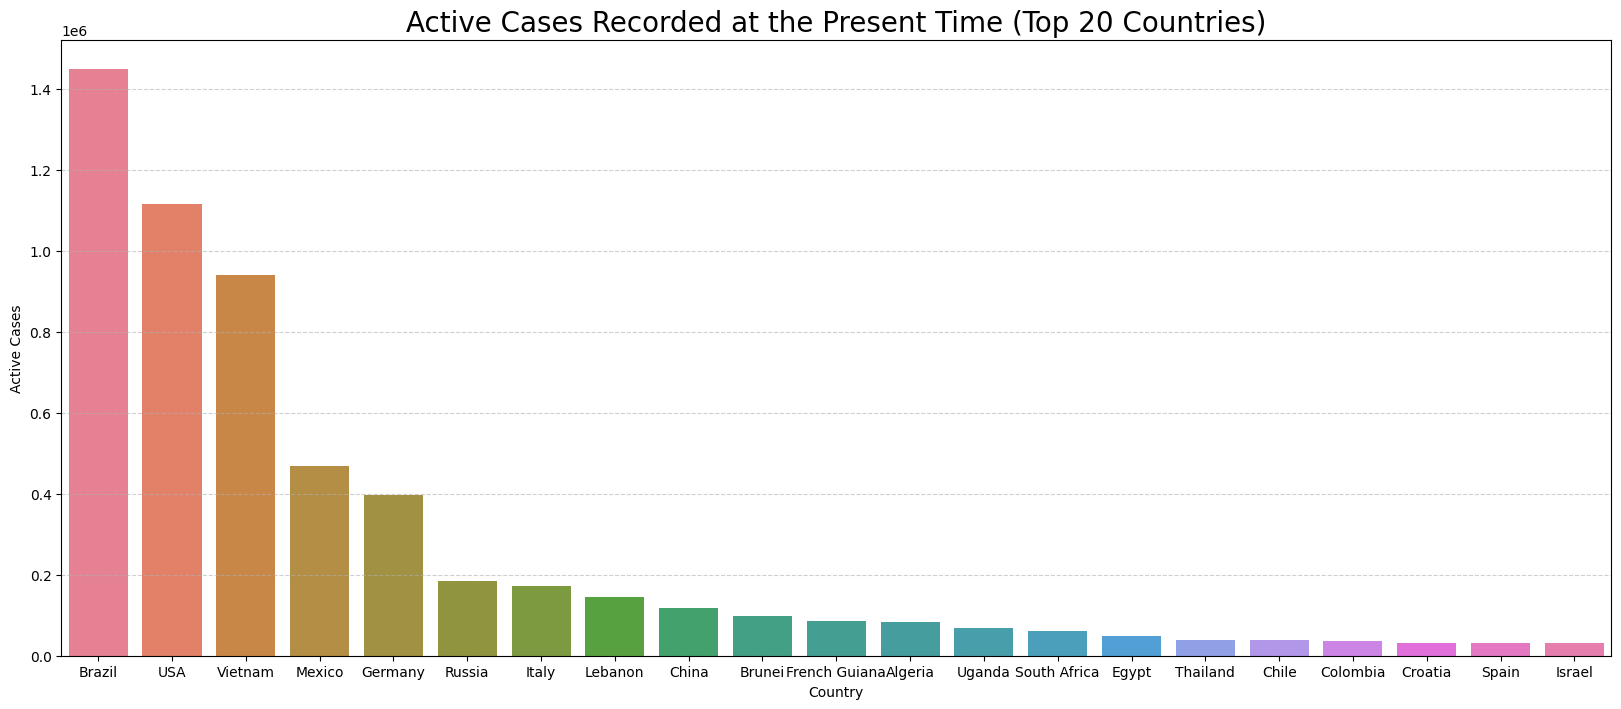

In [356]:
plt.figure(figsize=(20,8))
sns.barplot(data=activecases , x = 'Country',y='Active Cases' , hue='Country')
plt.title("Active Cases Recorded at the Present Time (Top 20 Countries)", fontsize = 20)
plt.grid(axis='y', linestyle='--',alpha=0.6)
plt.show()

Active Cases recorded at the present time was Brazil , USA, Vietnam , Mexico , Germany , Russia , Italy ,Lebanon , and the sequence follows

Question 8: Serious, Critical cases during the covid

In [357]:
seriouscritical = covid_analysis[['Country','Serious, Critical']][:231].sort_values(by='Serious, Critical' , ascending=False)
seriouscritical

,Country,"Serious, Critical"
0,USA,1771
21,Colombia,342
11,Spain,231
64,Bolivia,220
37,South Africa,192
...,...,...
94,Armenia,0
95,Bosnia and Herzegovina,0
96,Oman,0
97,Luxembourg,0


In [358]:
seriouscritical = seriouscritical[:21]
seriouscritical

,Country,"Serious, Critical"
0,USA,1771
21,Colombia,342
11,Spain,231
64,Bolivia,220
37,South Africa,192
114,Kyrgyzstan,131
88,Egypt,122
28,Canada,99
62,Lebanon,74
7,Italy,67


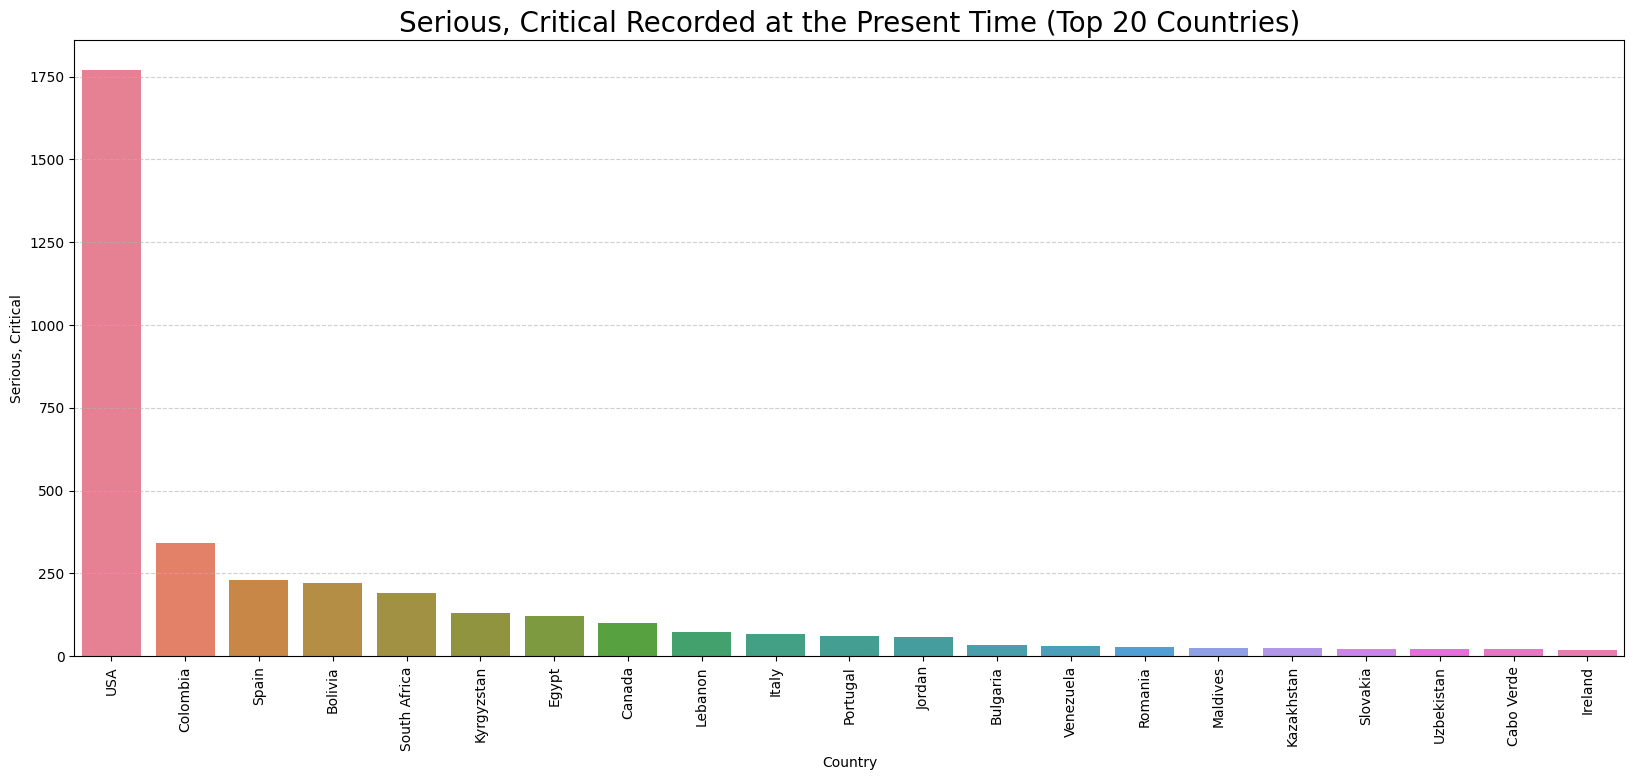

In [359]:
plt.figure(figsize=(20,8))
sns.barplot(data=seriouscritical , x = 'Country',y='Serious, Critical' , hue='Country')
plt.title("Serious, Critical Recorded at the Present Time (Top 20 Countries)", fontsize = 20)
plt.grid(axis='y', linestyle='--',alpha=0.6)
plt.xticks(rotation=90)
plt.show()

USA ,Colombia, Spain ,Bolivia,South Africa , and the sequence follows recorded most serious critical cases. 
USA is still leading most of the statistical case analysis

Question 9: Total Cases/1M pop per 1M population (Total Cases Per 1 Million Population) on each country

In [360]:
covid_analysis[['Country',"Total Cases/1M pop"]].isnull().sum()

Country               0
Total Cases/1M pop    0
dtype: int64

In [361]:
covid_analysis['Country'] = covid_analysis['Country'].fillna(0)
covid_analysis['Total Cases/1M pop'] = covid_analysis['Total Cases/1M pop'].fillna(0)

In [362]:
covid_analysis.loc[238, 'Total Cases/1M pop'] = int(float(covid_analysis.iloc[238]['Total Cases/1M pop']))

In [363]:
covid_analysis.iloc[238]['Total Cases/1M pop']

90256

In [364]:
covid_analysis['Total Cases/1M pop'] = covid_analysis['Total Cases/1M pop'].astype('int64')

In [365]:
totalcases1Mpop = covid_analysis[['Country',"Total Cases/1M pop"]][:231].sort_values(by="Total Cases/1M pop", ascending=False)
totalcases1Mpop

,Country,Total Cases/1M pop
101,Brunei,769596
171,San Marino,768226
163,Faeroe Islands,703959
5,S. Korea,673523
23,Austria,670727
...,...,...
200,Niger,381
230,China,347
228,Western Sahara,16
225,Diamond Princess,0


In [366]:
totalcases1Mpop = totalcases1Mpop[:21]
totalcases1Mpop

,Country,Total Cases/1M pop
101,Brunei,769596
171,San Marino,768226
163,Faeroe Islands,703959
5,S. Korea,673523
23,Austria,670727
57,Slovenia,652733
224,Niue,650432
151,Andorra,619844
111,Martinique,615777
2,France,612013


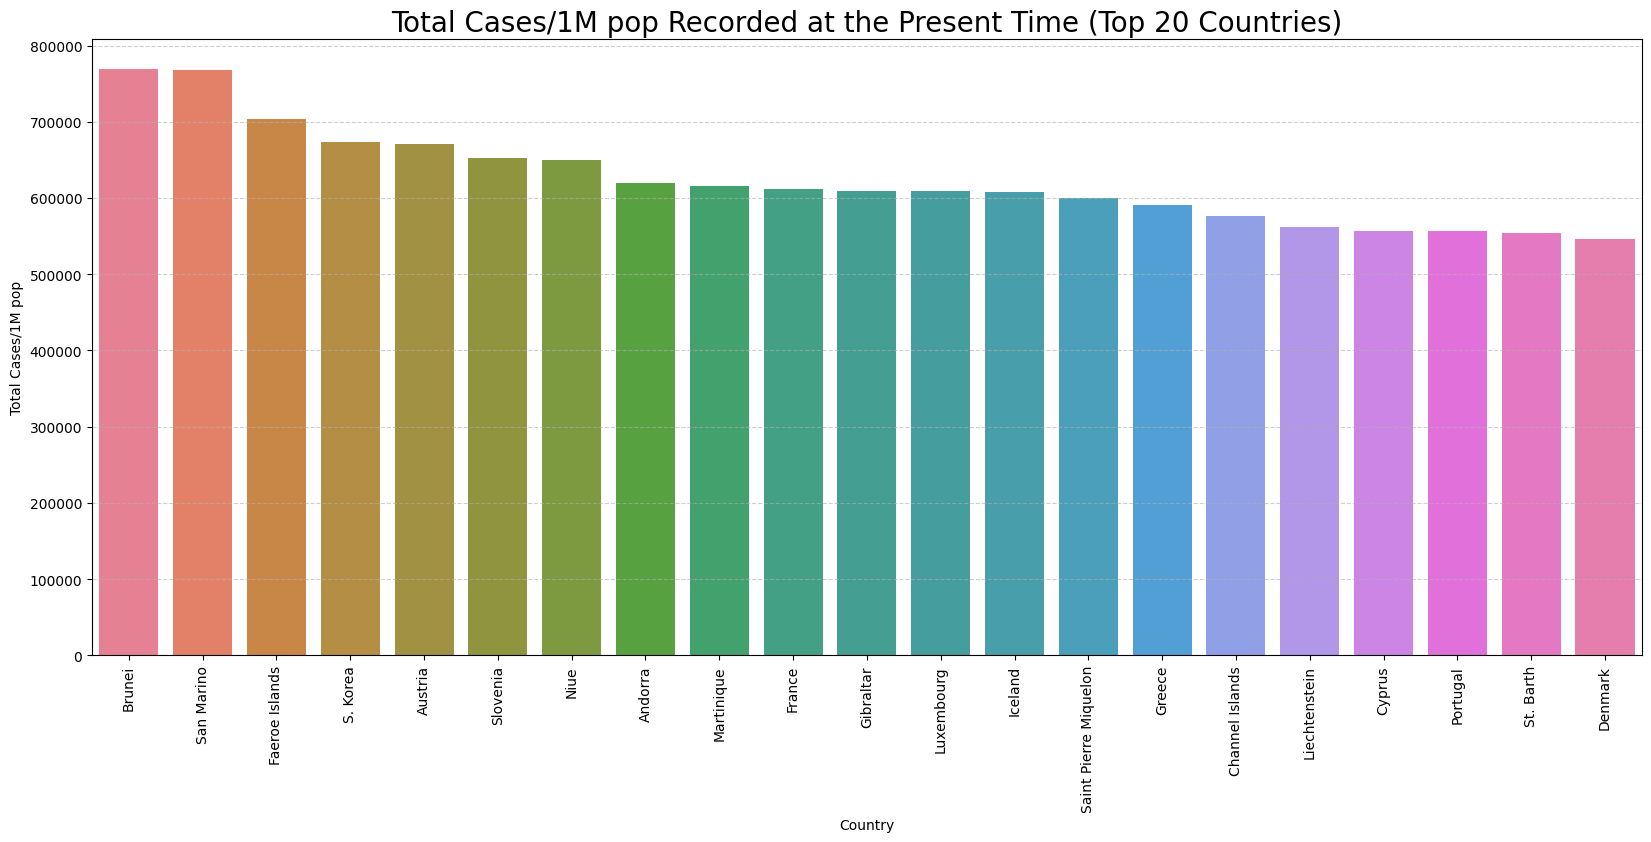

In [367]:
plt.figure(figsize=(20,8))
sns.barplot(data=totalcases1Mpop , x = 'Country',y='Total Cases/1M pop' , hue='Country')
plt.title("Total Cases/1M pop Recorded at the Present Time (Top 20 Countries)", fontsize = 20)
plt.grid(axis='y', linestyle='--',alpha=0.6)
plt.xticks(rotation=90)
plt.show()

Per 1 Million Population ,the total cases recorded differs from countries and this time Brunei was leading , followed by San Marino , Faeroe Islands, S.Korea and the sequence follows 

Question 10: Deaths/1M pop (Death Cases Per 1 Million Population) on each country

In [368]:
covid_analysis[['Country',"Deaths/1M pop"]].isnull().sum()

Country          0
Deaths/1M pop    0
dtype: int64

In [369]:
covid_analysis['Deaths/1M pop'] = covid_analysis['Deaths/1M pop'].fillna(0)

In [370]:
covid_analysis.iloc[238]['Deaths/1M pop']

'896.1'

In [371]:
covid_analysis.loc[238, 'Deaths/1M pop'] = int(float(covid_analysis.iloc[238]['Deaths/1M pop']))

In [372]:
covid_analysis['Deaths/1M pop'] = covid_analysis['Deaths/1M pop'].astype('int64')

In [373]:
covid_analysis.iloc[238]['Deaths/1M pop']

896

In [374]:
deaths1Mpop = covid_analysis[['Country','Deaths/1M pop']][:231].sort_values(by='Deaths/1M pop', ascending=False)
deaths1Mpop

,Country,Deaths/1M pop
34,Peru,6595
58,Bulgaria,5660
46,Hungary,5105
95,Bosnia and Herzegovina,5042
98,North Macedonia,4791
...,...,...
224,Niue,0
225,Diamond Princess,0
226,Tokelau,0
227,Vatican City,0


In [375]:
deaths1Mpop = deaths1Mpop[:21]
deaths1Mpop

,Country,Deaths/1M pop
34,Peru,6595
58,Bulgaria,5660
46,Hungary,5105
95,Bosnia and Herzegovina,5042
98,North Macedonia,4791
59,Croatia,4604
104,Montenegro,4531
49,Georgia,4317
33,Czechia,4052
48,Slovakia,3886


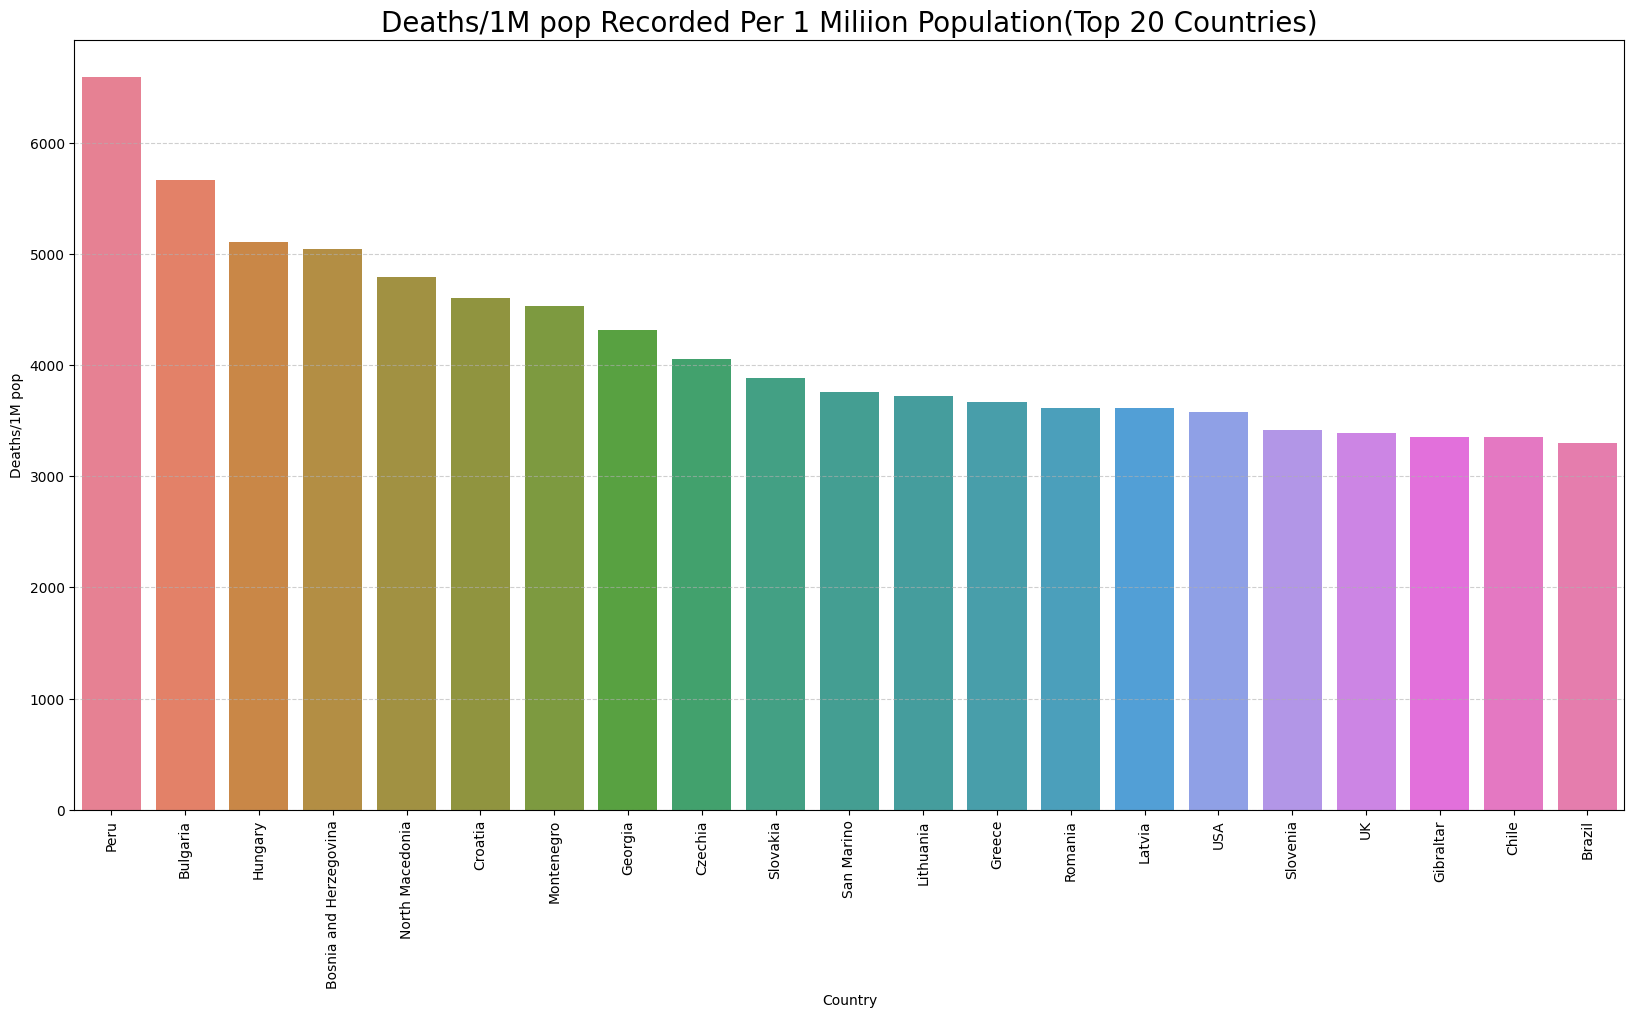

In [376]:
plt.figure(figsize=(20,10))
sns.barplot(data=deaths1Mpop , x = 'Country',y='Deaths/1M pop' , hue='Country')
plt.title("Deaths/1M pop Recorded Per 1 Miliion Population(Top 20 Countries)", fontsize = 20)
plt.grid(axis='y', linestyle='--',alpha=0.6)
plt.xticks(rotation=90)
plt.show()

In the Graph , per 1 million population death cases recorded based on highest to lowest. Peru recorded much death cases after the total death cases recorded early on , followed by Bulgaria and the sequence follows

Question 11 : Total Test Cases during Covid time

In [377]:
totaltests = covid_analysis[['Country','Total Tests']][:231].sort_values(by='Total Tests', ascending=False)
totaltests

,Country,Total Tests
0,USA,1186742917
1,India,935879495
8,UK,522526476
11,Spain,471036328
7,Italy,280238086
...,...,...
203,Comoros,0
137,French Polynesia,0
182,Nicaragua,0
183,Tajikistan,0


In [378]:
totaltests = totaltests[:21]
totaltests

,Country,Total Tests
0,USA,1186742917
1,India,935879495
8,UK,522526476
11,Spain,471036328
7,Italy,280238086
9,Russia,273400000
2,France,271490188
23,Austria,211273524
68,UAE,200732262
10,Turkey,162743369


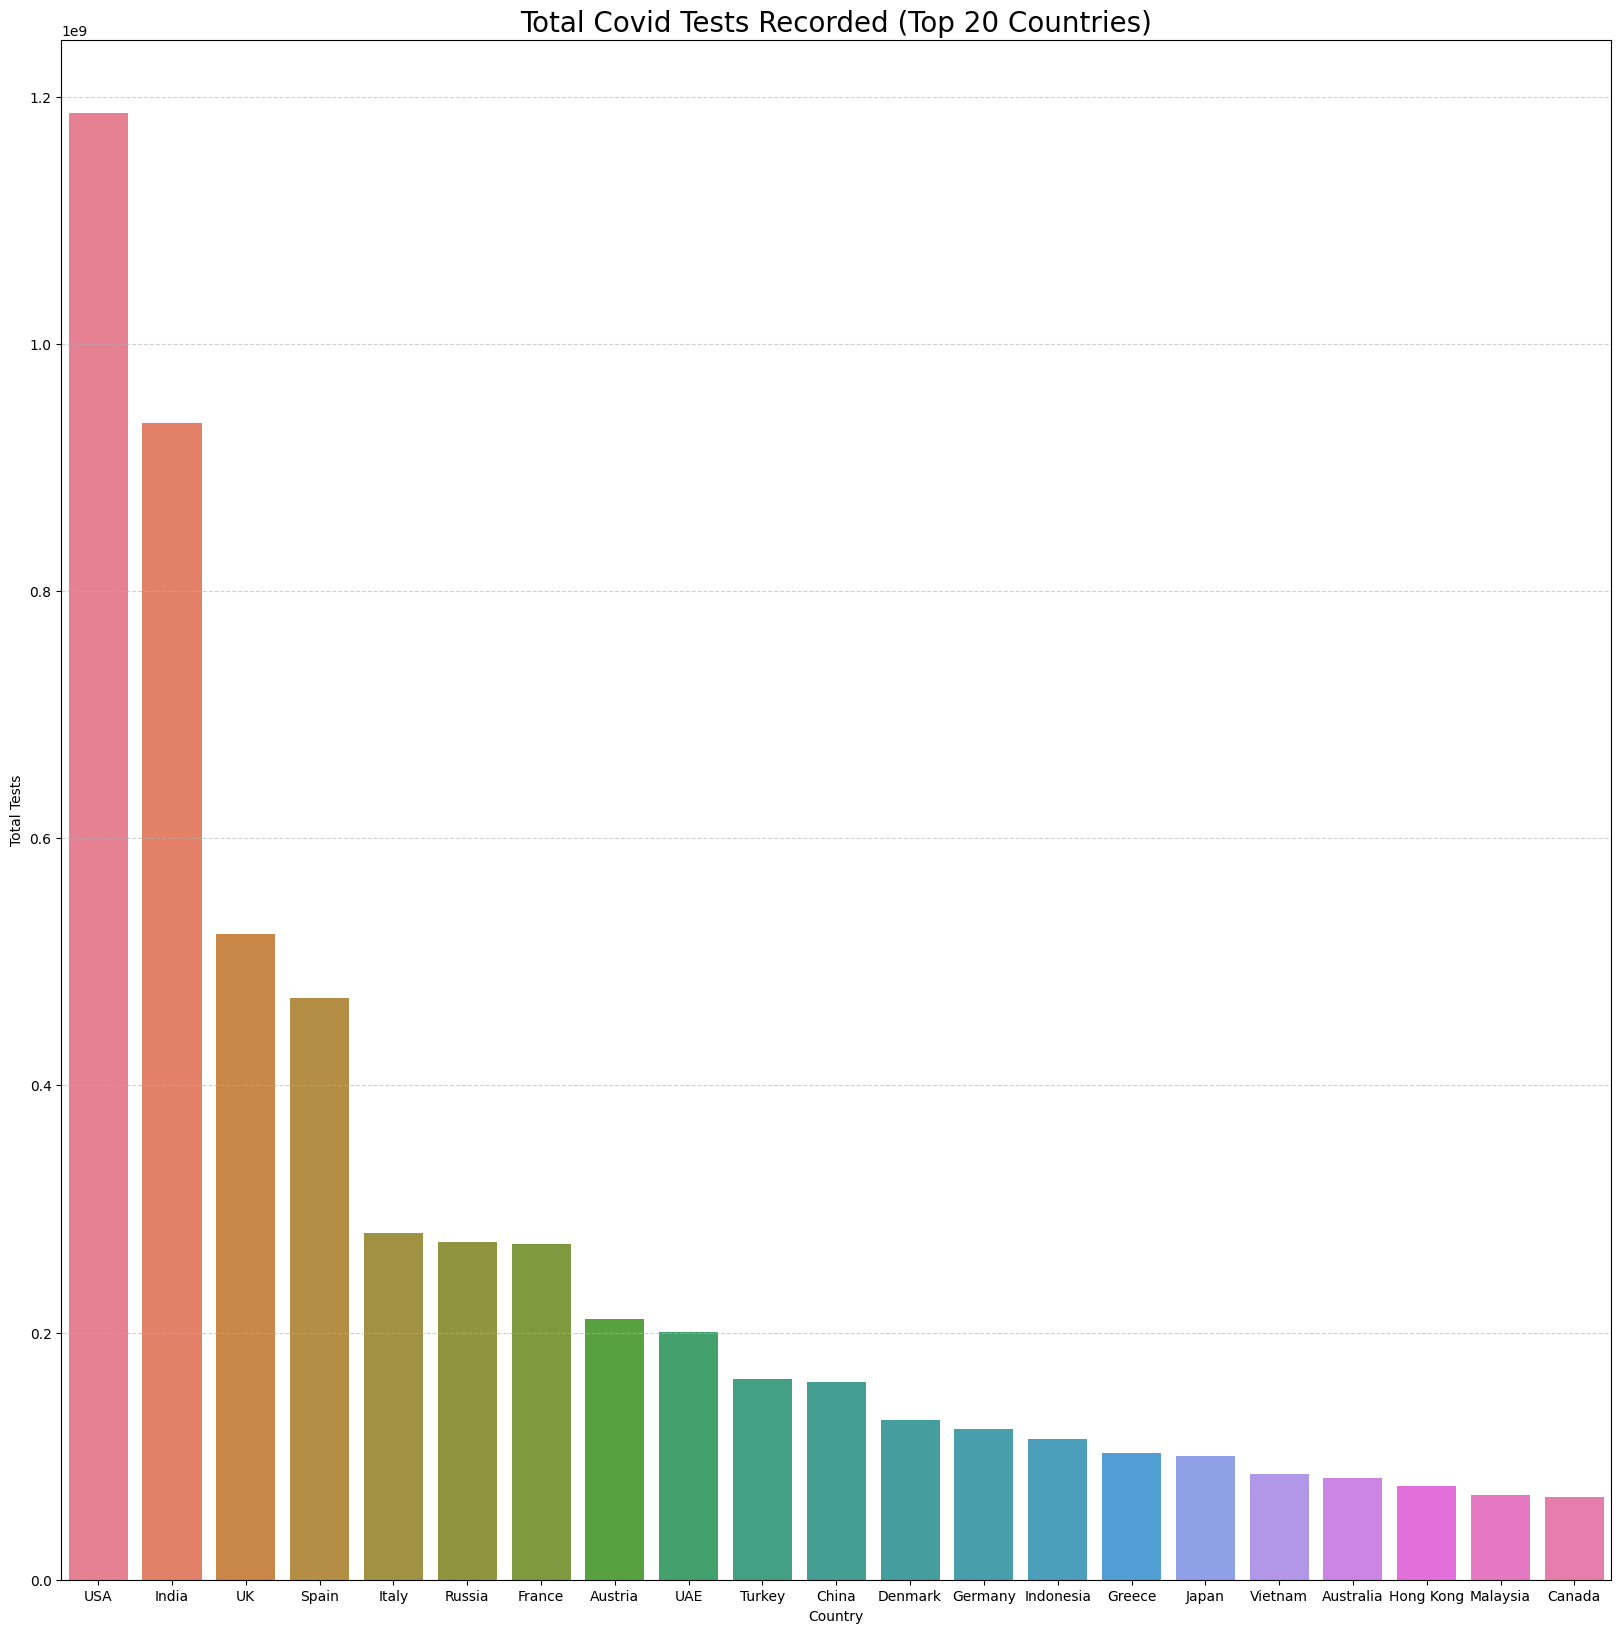

In [379]:
plt.figure(figsize=(20,20))
sns.barplot(data=totaltests , x = 'Country',y='Total Tests' , hue='Country')
plt.title("Total Covid Tests Recorded (Top 20 Countries)", fontsize = 20)
plt.grid(axis='y', linestyle='--',alpha=0.6)
plt.show()

The Observation shows USA leading most of the Chart , now its leading the top recorded total test covid cases

Question 12 : Test cases per 1 million population (Tests/1M pop)

In [380]:
covid_analysis[['Country','Tests/1M pop']].dtypes

Country         object
Tests/1M pop    object
dtype: object

In [381]:
covid_analysis['Tests/1M pop'] = covid_analysis['Tests/1M pop'].astype('int64')

In [382]:
covid_analysis[['Country','Tests/1M pop']].dtypes

Country         object
Tests/1M pop     int64
dtype: object

In [383]:
tests1Mpop = covid_analysis[['Country','Tests/1M pop']][:231].sort_values(by='Tests/1M pop', ascending=False)
tests1Mpop

,Country,Tests/1M pop
23,Austria,23302116
39,Denmark,22165247
68,UAE,19910389
180,Bermuda,16622128
178,Gibraltar,15852213
...,...,...
188,Marshall Islands,0
155,Tanzania,0
203,Comoros,0
172,Solomon Islands,0


In [384]:
tests1Mpop = tests1Mpop[:21]
tests1Mpop

,Country,Tests/1M pop
23,Austria,23302116
39,Denmark,22165247
68,UAE,19910389
180,Bermuda,16622128
178,Gibraltar,15852213
163,Faeroe Islands,15802409
211,Turks and Caicos,15517224
11,Spain,10082298
41,Hong Kong,10011143
22,Greece,9909078


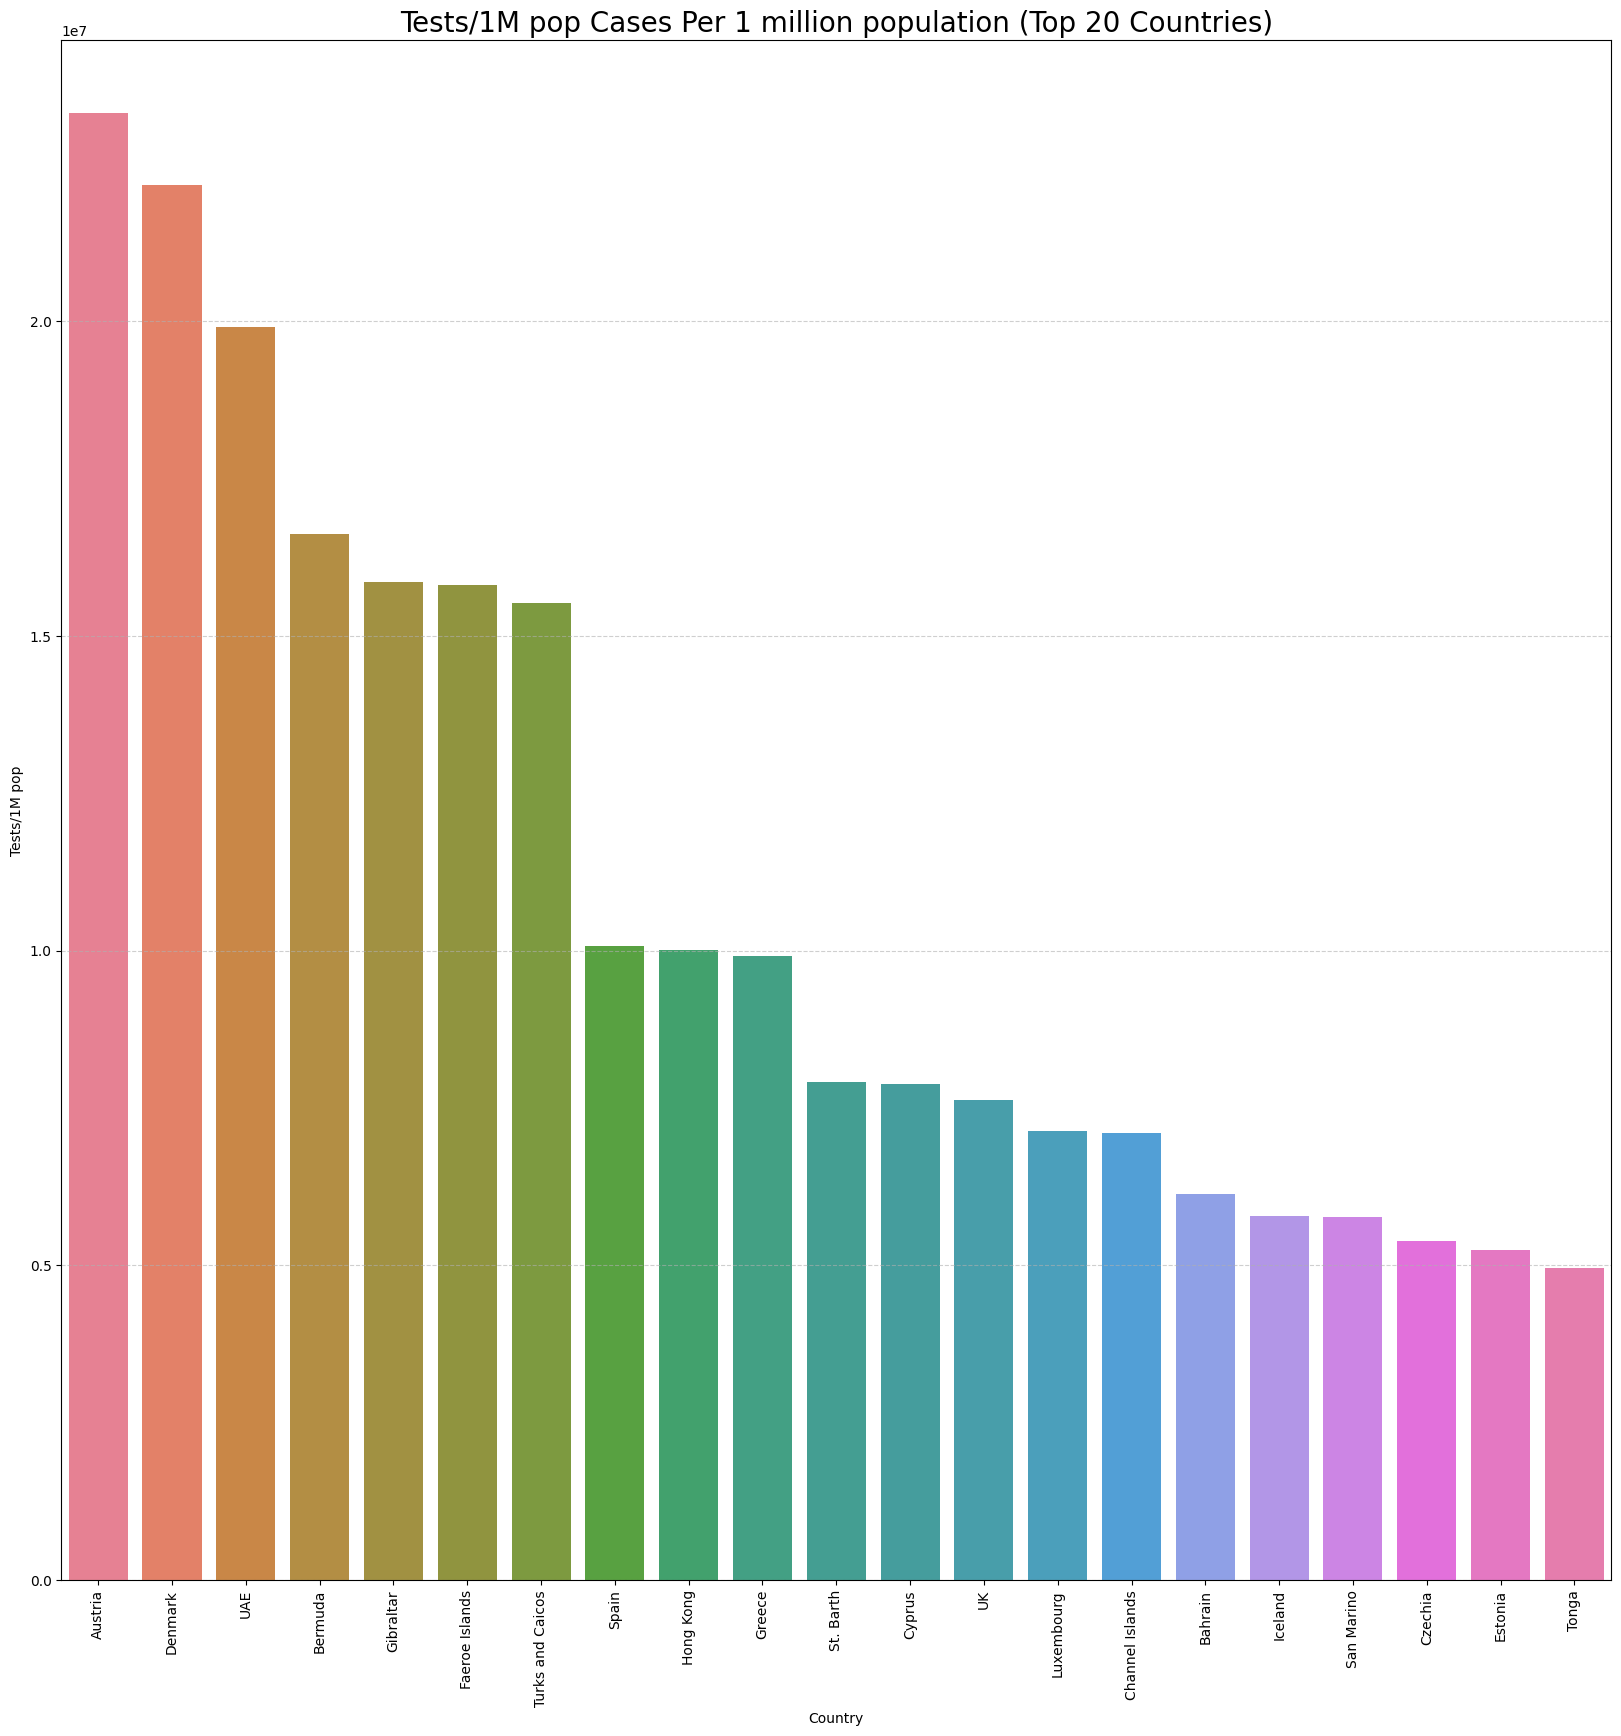

In [385]:
plt.figure(figsize=(20,20))
sns.barplot(data=tests1Mpop, x = 'Country',y='Tests/1M pop' , hue='Country')
plt.title("Tests/1M pop Cases Per 1 million population (Top 20 Countries)", fontsize = 20)
plt.grid(axis='y', linestyle='--',alpha=0.6)
plt.xticks(rotation=90)
plt.show()

Based on 1 million population on test cases, Austria was leading followed by Denmark , then the sequence follows

Question 13 : Population of each country during Covid Era

In [386]:
population = covid_analysis[['Country','Population']][:231].sort_values(by='Population', ascending=False)
population

,Country,Population
230,China,1448471400
1,India,1406631776
0,USA,334805269
19,Indonesia,279134505
52,Pakistan,229488994
...,...,...
224,Niue,1622
226,Tokelau,1378
227,Vatican City,799
225,Diamond Princess,0


In [387]:
population = population[:21]
population

,Country,Population
230,China,1448471400
1,India,1406631776
0,USA,334805269
19,Indonesia,279134505
52,Pakistan,229488994
106,Nigeria,216746934
4,Brazil,215353593
47,Bangladesh,167885689
9,Russia,145805947
17,Mexico,131562772


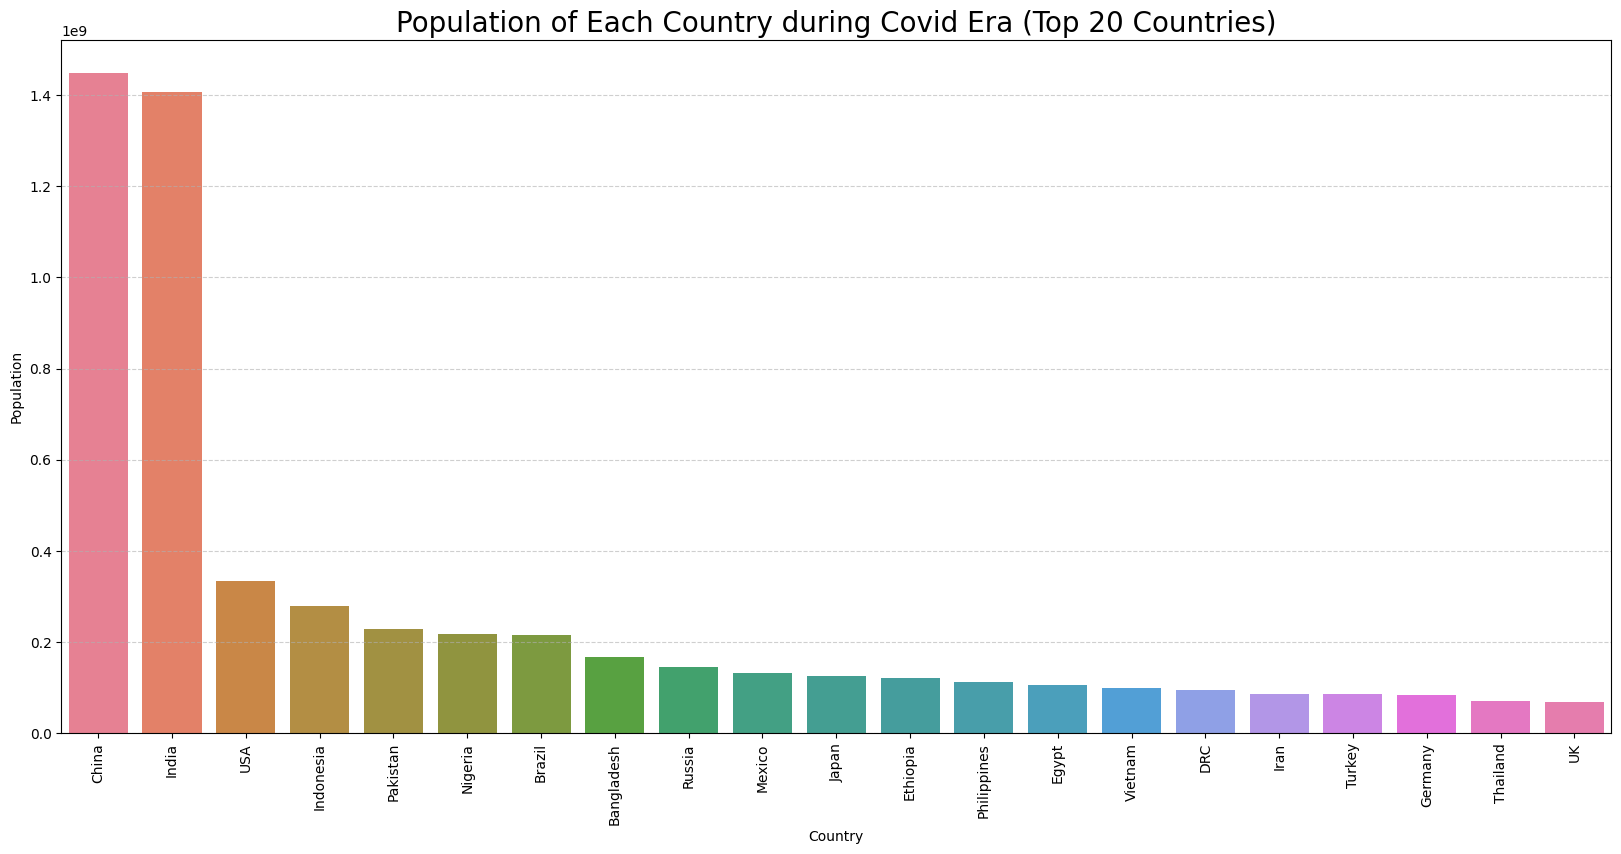

In [388]:
plt.figure(figsize=(20,9))
sns.barplot(data=population, x = 'Country',y='Population' , hue='Country')
plt.title("Population of Each Country during Covid Era (Top 20 Countries)", fontsize = 20)
plt.grid(axis='y', linestyle='--',alpha=0.6)
plt.xticks(rotation=90)
plt.show()

List of Population of countries during the covid era was China,leading the list , follwed by India and the sequence follows

CONCLUSION ON THE EDA DATA ANALYSIS

It can be observed that USA was leading the most covid cases , which indicate that USA was most affected Country

In [389]:
from scipy import * 

In [390]:
covid_analysis.columns

Index(['Country', 'Total Cases', 'New Cases', 'Total Deaths', 'New Deaths',
       'Total Recovered', 'New Recovered', 'Active Cases', 'Serious, Critical',
       'Total Cases/1M pop', 'Deaths/1M pop', 'Total Tests', 'Tests/1M pop',
       'Population'],
      dtype='object')

In [391]:
covid_columns = covid_analysis[['Total Cases', 'New Cases', 'Total Deaths', 'New Deaths',
       'Total Recovered', 'New Recovered', 'Active Cases', 'Serious, Critical',
       'Total Cases/1M pop', 'Deaths/1M pop', 'Total Tests', 'Tests/1M pop',
       'Population']]

In [392]:
covid_columns

,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,"Serious, Critical",Total Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Population
0,111367209,0,1199031,0,109053249,0,1114929,1771,332633,3581,1186742917,3544577,334805269
1,45028429,161,533475,2,0,0,0,0,32012,379,935879495,665334,1406631776
2,40138560,0,167642,0,39970918,0,0,0,612013,2556,271490188,4139547,65584518
3,38819284,574,182439,28,38240600,0,396245,0,462776,2175,122332384,1458359,83883596
4,38407327,0,709765,0,36249161,0,1448401,0,178345,3296,63776166,296146,215353593
...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,69791773,0,1365551,0,66648277,0,1777945,8953,0,0,0,0,0
235,14826780,1345,32665,0,14572565,0,221550,33,0,0,0,0,0
236,12859770,0,258884,0,12089899,0,510987,529,0,0,0,0,0
237,721,0,15,0,706,0,0,0,0,0,0,0,0


14 . Information Outliner

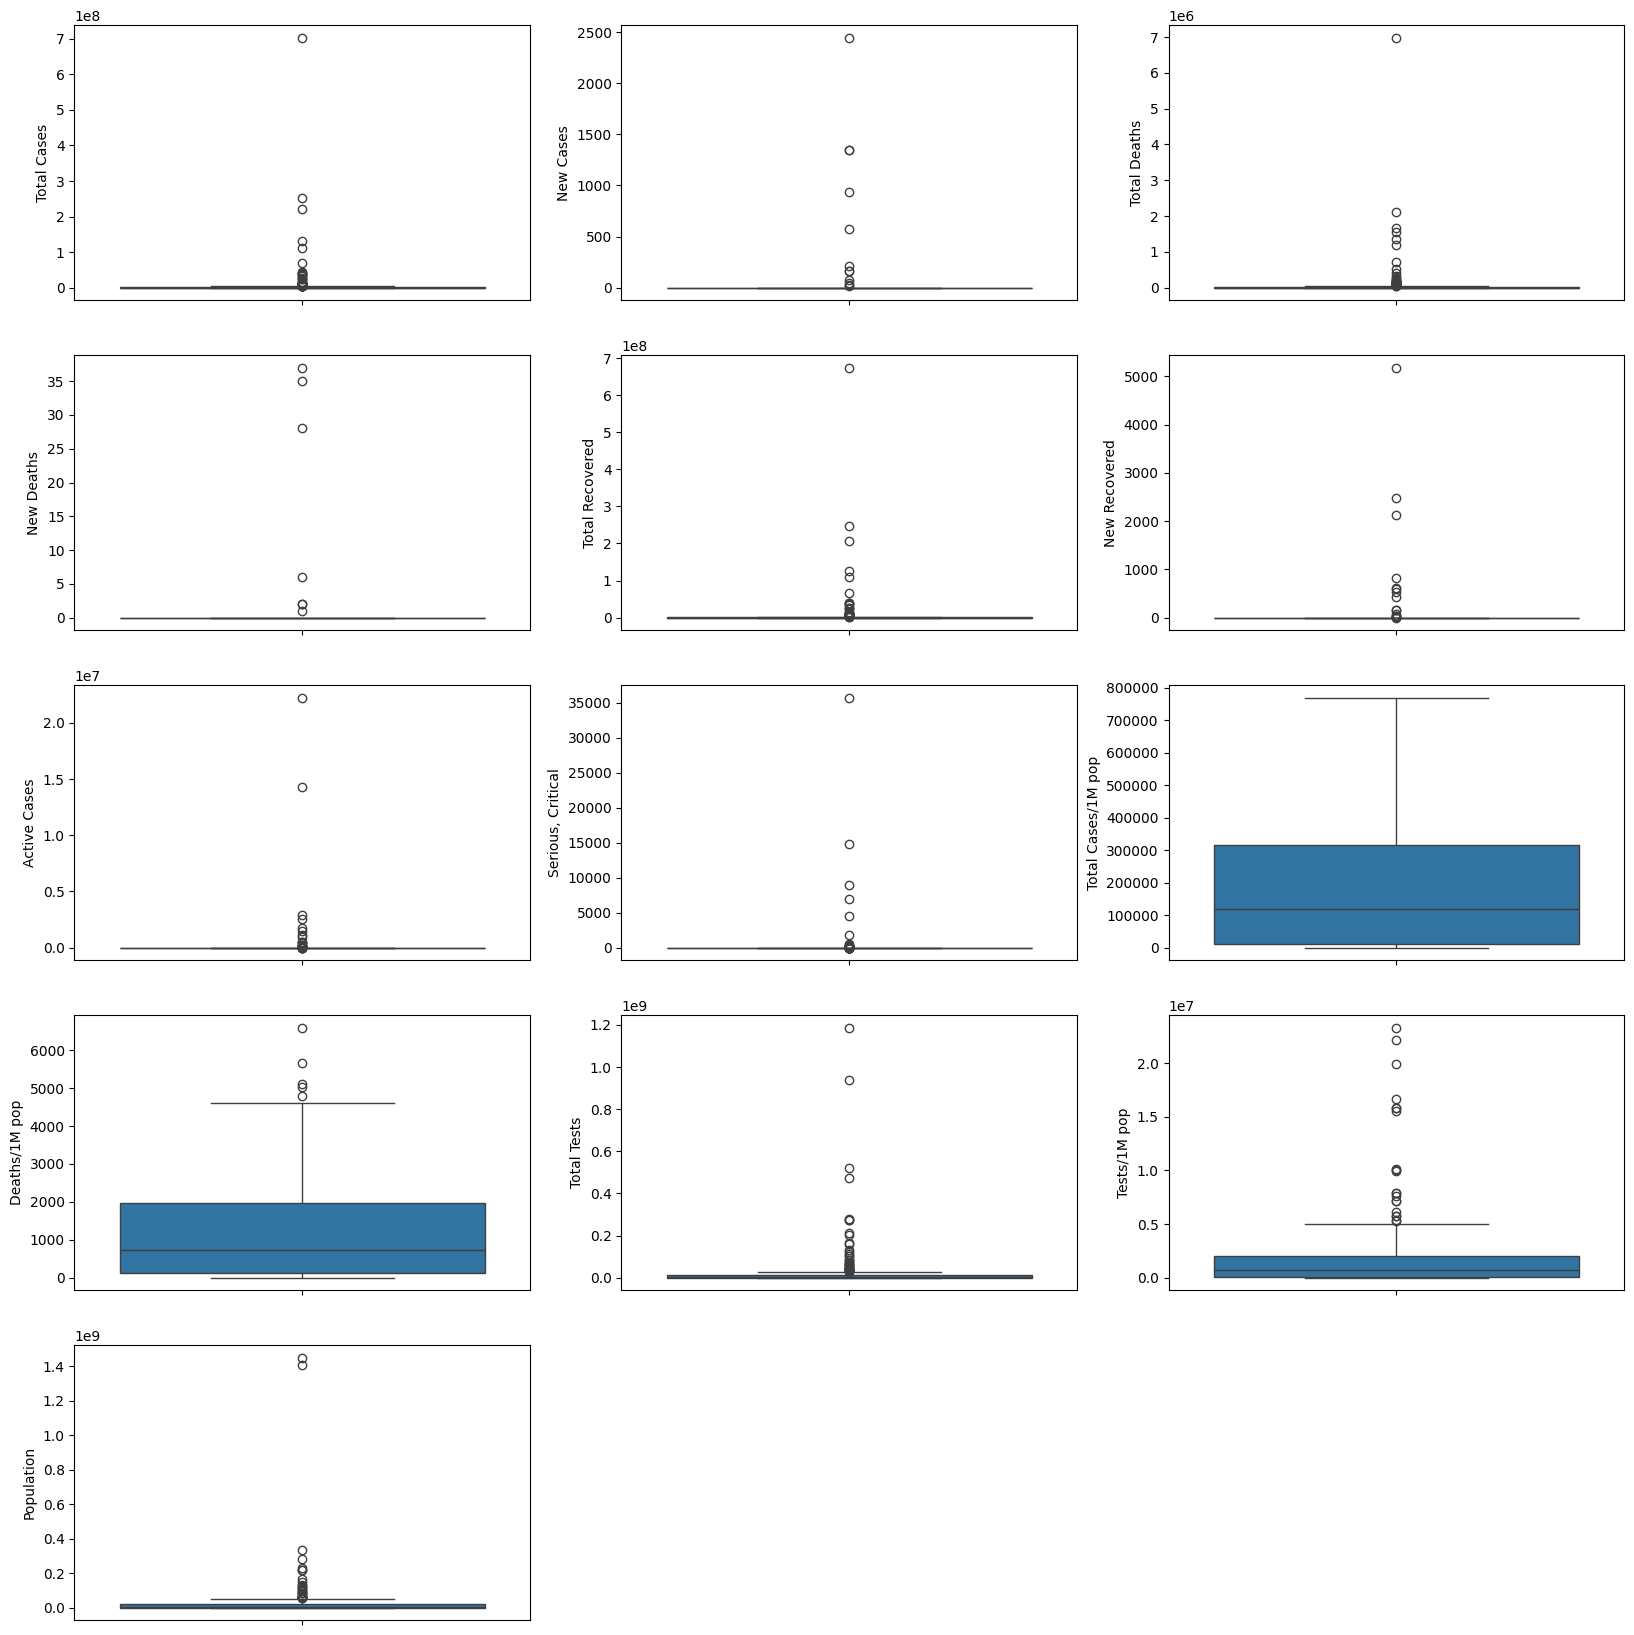

In [393]:
i=1
plt.figure(figsize=(20,25))
for feature in covid_columns:
    plt.subplot(6,3,i)
    sns.boxplot(y=covid_columns[feature])
    i+=1

This is box plot similar to violin graph , indicating information outliner . Information Outliner are informations recorded due to error or can be said that it stands out from the average rate of list or group of categories. The violinplot below explains better

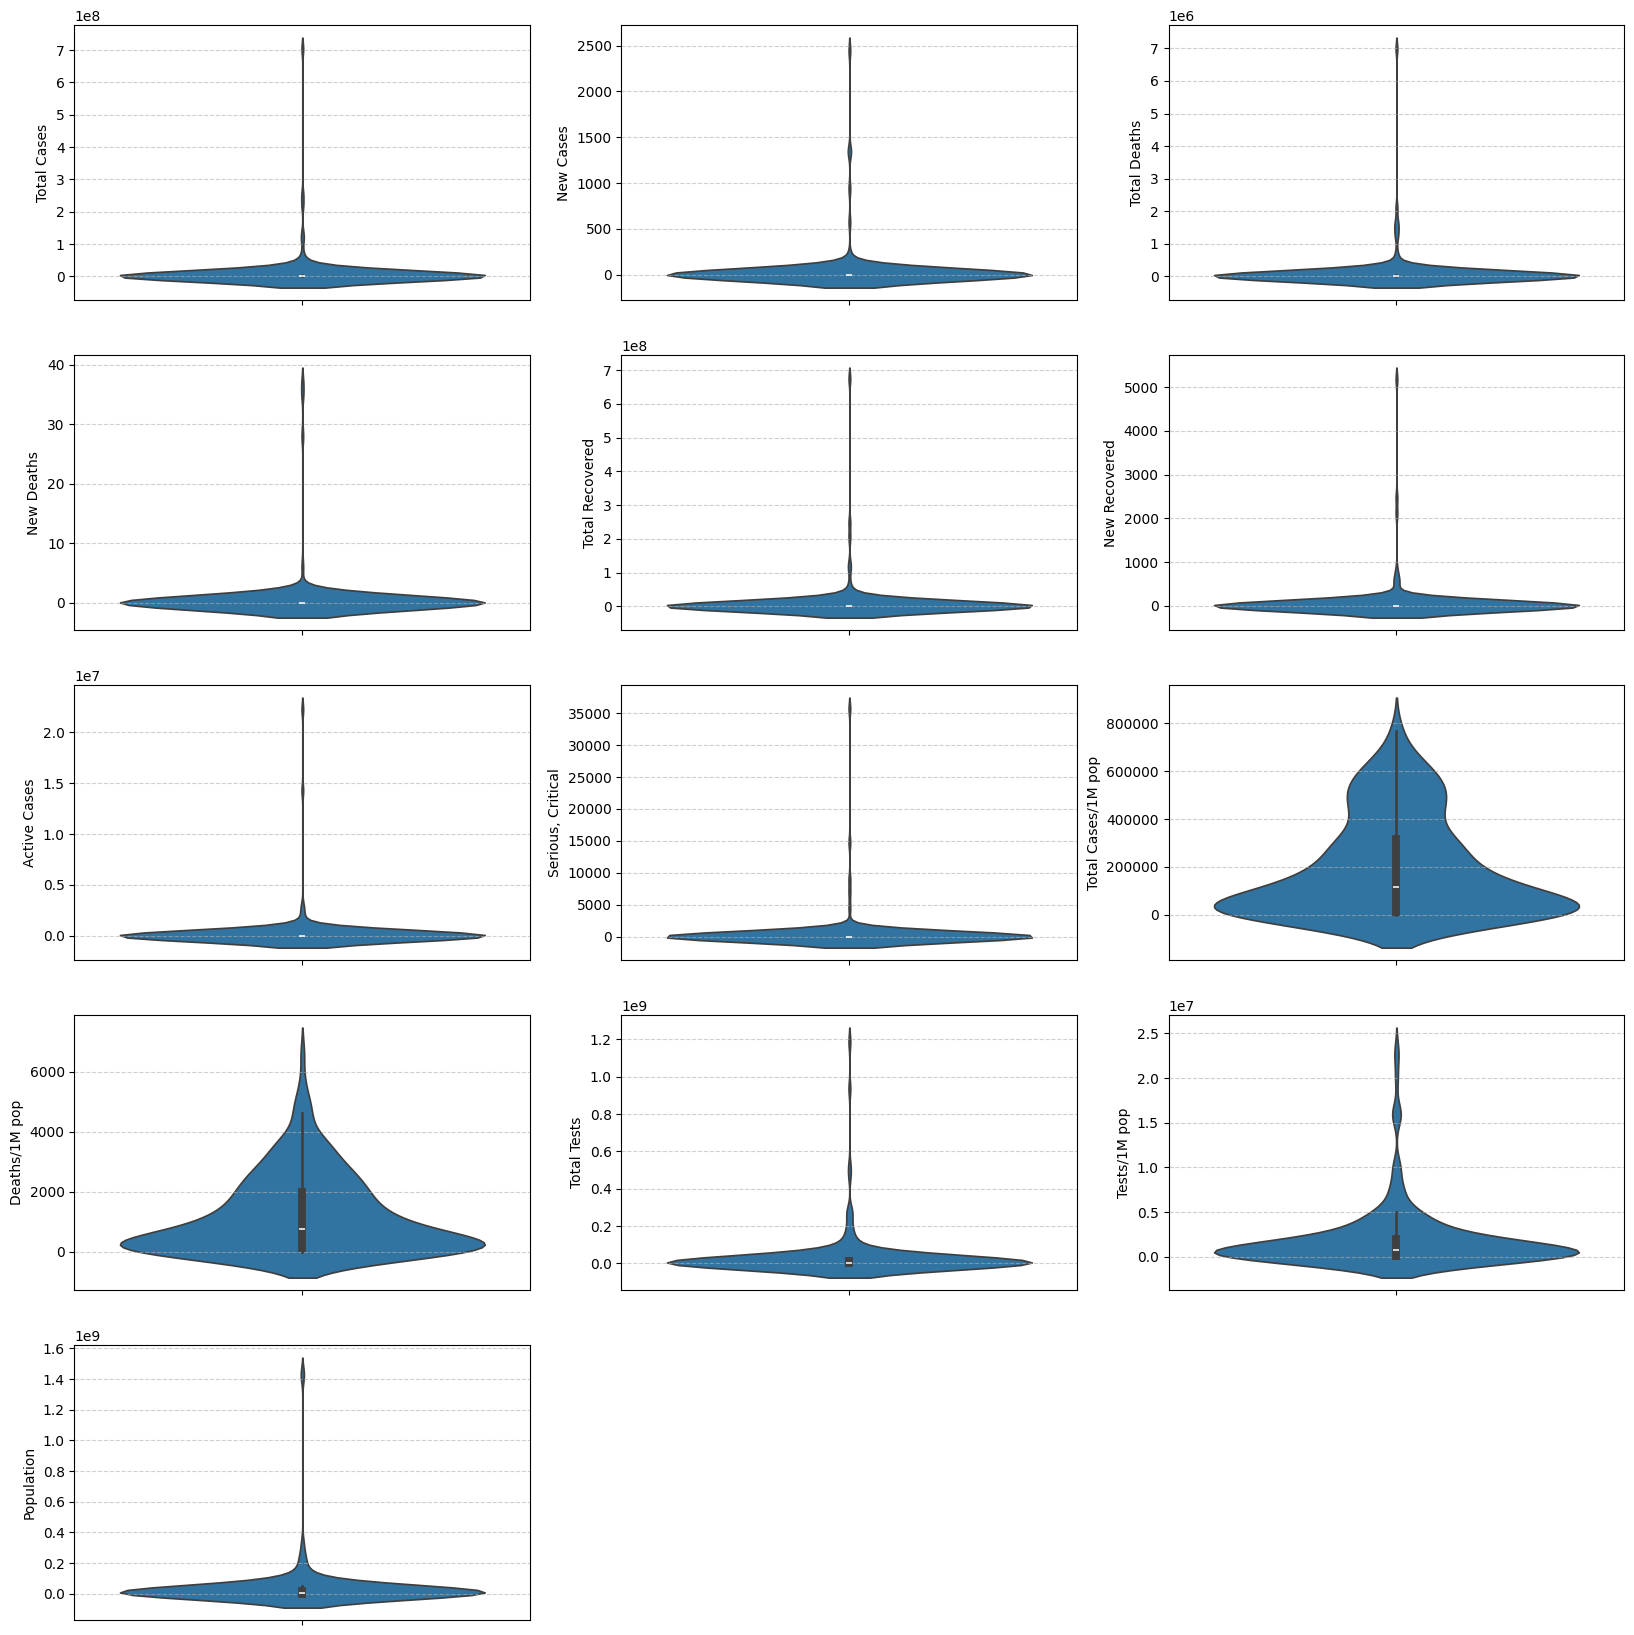

In [394]:
i=1
plt.figure(figsize=(20,25))
for feature in covid_columns:
    plt.subplot(6,3,i)
    sns.violinplot(y=covid_columns[feature])
    plt.grid(axis='y', linestyle='--',alpha=0.6)
    i+=1

This Violinplot explains outliners better , the longer line above the Interquartile range and median represents outliners. In the graph , it can be viewed that Total Cases/1M Pop had no outliners, i can predict that there was no error or out of range value in the recording of the Total Cases/1M pop and Deaths/1M pop

2 . Regression Analysis

Correlation

In [395]:
correlation = covid_columns.corr()
correlation

,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,"Serious, Critical",Total Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Population
Total Cases,1.000000,0.765032,0.985592,0.767559,0.997024,0.868127,0.927873,0.952706,-0.050282,-0.021847,0.129998,-0.049269,0.042420
New Cases,0.765032,1.000000,0.739791,0.726752,0.759517,0.723243,0.666264,0.696563,-0.021013,-0.041842,0.022227,-0.045789,0.010875
Total Deaths,0.985592,0.739791,1.000000,0.730067,0.983746,0.847728,0.902809,0.955367,-0.075534,-0.008404,0.137447,-0.061186,0.056615
New Deaths,0.767559,0.726752,0.730067,1.000000,0.771162,0.757467,0.600201,0.630544,-0.021703,-0.011599,0.022422,-0.051916,0.014012
Total Recovered,0.997024,0.759517,0.983746,0.771162,1.000000,0.872142,0.925621,0.952110,-0.049029,-0.019559,0.099563,-0.047962,0.003308
New Recovered,0.868127,0.723243,0.847728,0.757467,0.872142,1.000000,0.767139,0.802335,-0.026358,-0.023761,-0.016714,-0.042491,-0.025388
Active Cases,0.927873,0.666264,0.902809,0.600201,0.925621,0.767139,1.000000,0.967361,-0.077191,-0.050005,0.004734,-0.061223,-0.009976
"Serious, Critical",0.952706,0.696563,0.955367,0.630544,0.952110,0.802335,0.967361,1.000000,-0.082305,-0.059404,0.000770,-0.061448,-0.021720
Total Cases/1M pop,-0.050282,-0.021013,-0.075534,-0.021703,-0.049029,-0.026358,-0.077191,-0.082305,1.000000,0.462022,0.100588,0.538020,-0.126916
Deaths/1M pop,-0.021847,-0.041842,-0.008404,-0.011599,-0.019559,-0.023761,-0.050005,-0.059404,0.462022,1.000000,0.187285,0.274689,-0.060449


In [396]:
correlation = covid_columns.corr()
round(correlation, 2)

,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,"Serious, Critical",Total Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Population
Total Cases,1.00,0.77,0.99,0.77,1.00,0.87,0.93,0.95,-0.05,-0.02,0.13,-0.05,0.04
New Cases,0.77,1.00,0.74,0.73,0.76,0.72,0.67,0.70,-0.02,-0.04,0.02,-0.05,0.01
Total Deaths,0.99,0.74,1.00,0.73,0.98,0.85,0.90,0.96,-0.08,-0.01,0.14,-0.06,0.06
New Deaths,0.77,0.73,0.73,1.00,0.77,0.76,0.60,0.63,-0.02,-0.01,0.02,-0.05,0.01
Total Recovered,1.00,0.76,0.98,0.77,1.00,0.87,0.93,0.95,-0.05,-0.02,0.10,-0.05,0.00
New Recovered,0.87,0.72,0.85,0.76,0.87,1.00,0.77,0.80,-0.03,-0.02,-0.02,-0.04,-0.03
Active Cases,0.93,0.67,0.90,0.60,0.93,0.77,1.00,0.97,-0.08,-0.05,0.00,-0.06,-0.01
"Serious, Critical",0.95,0.70,0.96,0.63,0.95,0.80,0.97,1.00,-0.08,-0.06,0.00,-0.06,-0.02
Total Cases/1M pop,-0.05,-0.02,-0.08,-0.02,-0.05,-0.03,-0.08,-0.08,1.00,0.46,0.10,0.54,-0.13
Deaths/1M pop,-0.02,-0.04,-0.01,-0.01,-0.02,-0.02,-0.05,-0.06,0.46,1.00,0.19,0.27,-0.06


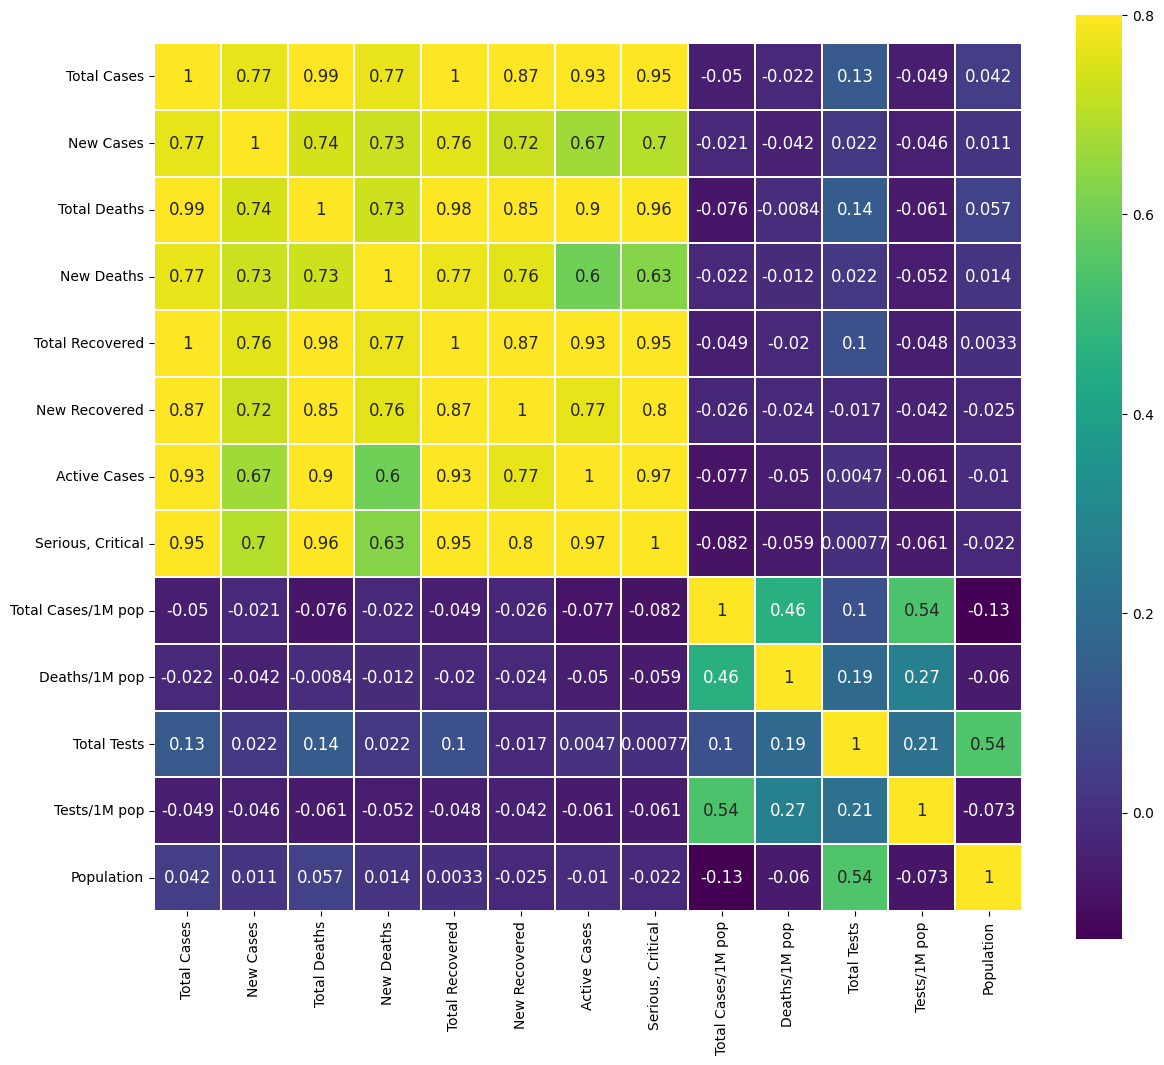

In [397]:
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(correlation, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",annot_kws = {'size':12})
plt.show()

This is a correlation matrix , a handy way to calculate the pairwise correlation coefficients between two or more numeric variables.

Note : Every correlation matrix is symmetrical meaning there are equal.

This can be seen visually from the graph that Active cases and New Deaths are strongly correlated with 0.6 common value.

It can also be seen that Active and New Cases are strongly correlated with the value of 0.67

The purple in the graph , indicate the negative values and their pairs

Coefficient of Correlation (measurement of linear correlation between two sets of data)

In [398]:
covid_columns.dtypes

Total Cases           Int64
New Cases             Int64
Total Deaths          Int64
New Deaths            Int64
Total Recovered       Int64
New Recovered         Int64
Active Cases          Int64
Serious, Critical     Int64
Total Cases/1M pop    int64
Deaths/1M pop         int64
Total Tests           Int64
Tests/1M pop          int64
Population            Int64
dtype: object

In [399]:
pearsonr = np.corrcoef(covid_columns['Total Cases'], covid_columns['New Cases']).round(2)
pearsonr

array([[1.00, 0.77],
       [0.77, 1.00]])

Simple Linear Regression with scikit-learn

Simple Linear Regression 1 (Between Total Cases and Total Deaths)

In [400]:
from sklearn.linear_model import LinearRegression
from sklearn import *

In [401]:
covid_columns

,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,"Serious, Critical",Total Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Population
0,111367209,0,1199031,0,109053249,0,1114929,1771,332633,3581,1186742917,3544577,334805269
1,45028429,161,533475,2,0,0,0,0,32012,379,935879495,665334,1406631776
2,40138560,0,167642,0,39970918,0,0,0,612013,2556,271490188,4139547,65584518
3,38819284,574,182439,28,38240600,0,396245,0,462776,2175,122332384,1458359,83883596
4,38407327,0,709765,0,36249161,0,1448401,0,178345,3296,63776166,296146,215353593
...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,69791773,0,1365551,0,66648277,0,1777945,8953,0,0,0,0,0
235,14826780,1345,32665,0,14572565,0,221550,33,0,0,0,0,0
236,12859770,0,258884,0,12089899,0,510987,529,0,0,0,0,0
237,721,0,15,0,706,0,0,0,0,0,0,0,0


In [402]:
covid_columns.shape

(239, 13)

In [403]:
total_cases = np.array(covid_columns['Total Cases'])
total_deaths = np.array(covid_columns['Total Deaths'])

<Axes: >

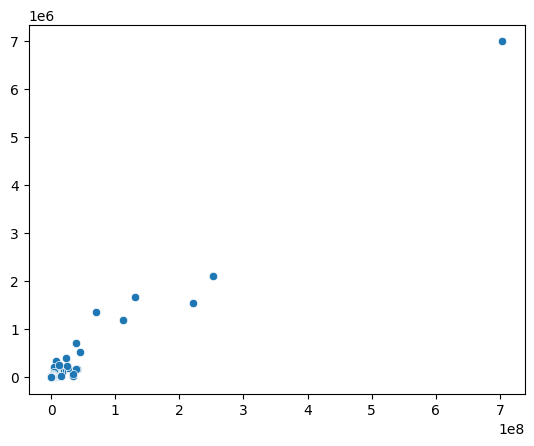

In [404]:
sns.scatterplot(x = total_cases , y = total_deaths)

In [405]:
from sklearn.model_selection import train_test_split

#splitting data using the train_test_split function in sklearn
X_train_cases , X_test_cases , Y_train_deaths , Y_test_deaths = train_test_split(total_cases , total_deaths, test_size = 0.2)

In [406]:
#initiazing the model
model_regressor = LinearRegression()
model_regressor

LinearRegression()

In [407]:
np.set_printoptions(suppress = True, formatter = {'float_kind' : '{:0.2f}'.format})
Y_train_deaths = Y_train_deaths.astype('int64')
Y_train_deaths

C:\Users\toy\AppData\Local\Temp\ipykernel_7440\799131088.py:2: RuntimeWarning: invalid value encountered in cast
  Y_train_deaths = Y_train_deaths.astype('int64')


array([                   8,                 5272,                  228,
                        161,                  386,                  123,
                        126,              1674775, -9223372036854775808,
                       3632,                28093,               146799,
                      10952,                12202,                  238,
                     102595,              1553005,                 1937,
                       2250,                  316,                    1,
                       5689,                12031,                  758,
                       1974,                 1300,               222161,
                      68860, -9223372036854775808,                 1102,
                     182439,                  128,                 2845,
                         80,                 1637,                  183,
                       5046,                   10,                34376,
                      27293,                 7118, 

In [408]:
#fitting the model on the training data
model_regressor.fit(X_train_cases.reshape(-1,1),Y_train_deaths)

LinearRegression()

In [409]:
#now we have trained our regression model , we can use it to predict new output values on the basis
#of new input values
#predicted y-axis values using the input data(x-axis) of the test data

y_value_prediction = model_regressor.predict(X_test_cases.reshape(-1,1))
y_value_prediction



array([-248832920801112416.00, -244910789275459232.00,
       -248850646928542912.00, -248841461879721376.00,
       -248361670178180448.00, -248831905479655968.00,
       -248850272630066944.00, -248810324372646304.00,
       -248811160649753024.00, -248834167480288256.00,
       -248848053364300000.00, -248836699152657152.00,
       -248853609633605568.00, -248841066213812736.00,
       -248488129276069760.00, -248610626557216480.00,
       -248854740633921728.00, -248730707108045920.00,
       -246645705446406656.00, -246947145397767904.00,
       -248850228421585536.00, -248708627918812352.00,
       -248656937151920448.00, -248707611123739840.00,
       -237932865835046784.00, -248791656604561728.00,
       -247828745039637536.00, -248806895268104704.00,
       -223384522886975328.00, -247348835448812864.00,
       -197434217978470560.00, -238604811911472448.00,
       -248007550663559712.00, -248613883985488576.00,
       -248848535973555424.00, -248848555130564064.00,
       -24

So here , the model has predicted output y -axis values on the basis of the input x-axis X_test_cases

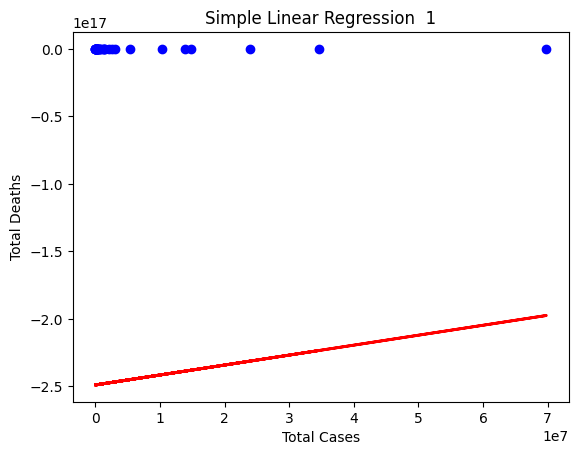

In [410]:
plt.scatter (X_test_cases,Y_test_deaths, color ='blue')
plt.plot(X_test_cases,y_value_prediction, color='red', linewidth=2)
plt.xlabel('Total Cases') #independent variable
plt.ylabel('Total Deaths') #dependent varaiable
plt.title('Simple Linear Regression  1')
plt.show()

According to the graph ,i can predict that during the covid era . Total Deaths cases were worse but as time went on,Total Deaths cases became less as the regression line expands on the y-axis(Total Deaths) from -1.4 towards about -1.2 .
While on the other hand, the Total cases(x-axis) kept on increasing from 0 to 7 , and progressing.

In [411]:
Y_test_deaths = Y_test_deaths.astype('int64')
Y_test_deaths


array([    743,   64497,     146,      94,   16897,     860,     177,
           997,      21,      37,     372,     163,      24,     400,
          7574,    3605,       8,    1462,    1933,    5533,     124,
          4230,    6881,    1021,   32665,    2686,    9895,    1426,
         35934,   29482, 1365551,  121760,   29423,    2801,      21,
          2159,     690,     312,      15,   13848,   20283,    9646,
          1051,   19005,     468,      12,  402264,     688], dtype=int64)

In [412]:
#evaluate the model
#the R-squared value measures how well the linear regression model fits the data, ranging from 0 to 1 , where 1 indicates a perfect fit
r_square = model_regressor.score(X_test_cases.reshape(-1,1),Y_test_deaths.reshape(-1,1))
print(f'coefficient of determination: {r_square}')

coefficient of determination: -1.4917233850267642e+24


In [413]:
slope = model_regressor.coef_[0]
intercept = model_regressor.intercept_

print(f'Slope (Coefficient) : {slope}') #b1
print(f'Intercept: {intercept}') #b0

Slope (Coefficient) : 736808023.5464822
Intercept: -2.488573563024053e+17


Simple Linear Regression 2 (Positive Linear Relationship between the Test/1M pop and Deaths/1M pop) 

In [414]:
from sklearn.model_selection import train_test_split

In [415]:
#Loading and preparing the data 
X = covid_columns[['Tests/1M pop']].values.reshape(-1,1)
Y = covid_columns['Deaths/1M pop'].values 

In [416]:
#splitting data using the train_test_split function in sklearn
X_train , X_test , Y_train , Y_test = train_test_split(X , Y, test_size = 0.2 , random_state=42)

In [417]:
#creating the model and fitiing the model on the training data
model = LinearRegression().fit(X_train,Y_train)
model

LinearRegression()

In [418]:
#making predictions on the test data using the train model
y_predict = model.predict(X_test.reshape(-1,1))
y_predict

#here , the model has predicted output y-axis values on the basis
#of the input x-axis values X_test

array([1519.87, 1156.13, 1094.34, 1082.61, 1506.30, 1078.59, 1079.53,
       1134.44, 1260.44, 1080.35, 1123.54, 1081.14, 1106.08, 1189.13,
       1639.17, 1078.59, 1102.28, 1153.87, 1078.59, 1084.67, 1352.40,
       1118.25, 1078.59, 1508.85, 1079.73, 1259.70, 1263.06, 1168.45,
       1078.59, 1081.19, 1534.00, 1457.74, 1151.80, 1082.01, 1143.21,
       1249.73, 2583.53, 1137.04, 1842.82, 1079.61, 1078.59, 1094.57,
       1146.05, 1225.01, 1078.59, 1202.12, 1079.69, 1224.42])

In [419]:
#evaluating the model
#assessing model's performance using metrics like Mean Squared Error (MSE) and R-Squared (R2) on the test data
#the R-squared value measures how well the linear regression model fits the data, ranging from 0 to 1 , where 1 indicates a perfect fit
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(Y_test,y_predict)
r2 = r2_score (Y_test, y_predict)
print(f'Mean Squared Error: {mse}')
print(f'R-Sqaured (R2) : {r2}')      

Mean Squared Error: 1152538.5536183007
R-Sqaured (R2) : -0.0001626307967368401


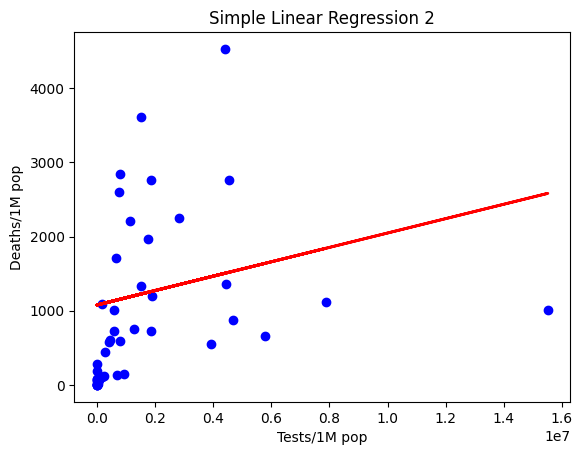

In [420]:
plt.scatter (X_test , Y_test , color ='blue')
plt.plot(X_test,y_predict , color='red' , linewidth=2)
plt.xlabel('Tests/1M pop') #independent variable
plt.ylabel('Deaths/1M pop') #dependent varaiable
plt.title('Simple Linear Regression 2')
plt.show()

Could be said that as the Test/1M pop increases (independent variable) , the Deaths/1M pop also increases (dependent variable).This can be predicted that during the covid era , as Test/1M pop are been conducted on patients ,Deaths/1M pop rate also increases 

In [421]:
#interpreting the result
#analyzing the regression coefficients to understand the relationship between the independent and dependent variables
#coefficients

slope = model.coef_[0]
intercept = model.intercept_

print(f'Slope (Coefficient) : {slope}') #b1
print(f'Intercept: {intercept}') #b0

Slope (Coefficient) : 9.698548127736435e-05
Intercept: 1078.5865696946842


It can be seen that , the predicted value that is intercept when x = 0 is 1078.5865696946842. This where the regression line starts from ,one of the data points is actually fitted on the regression line that is the predicted value 1078.5865696946842

Simple Linear Regression 3 (Between Total Deaths and Population)

In [422]:
covid_columns

,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,"Serious, Critical",Total Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Population
0,111367209,0,1199031,0,109053249,0,1114929,1771,332633,3581,1186742917,3544577,334805269
1,45028429,161,533475,2,0,0,0,0,32012,379,935879495,665334,1406631776
2,40138560,0,167642,0,39970918,0,0,0,612013,2556,271490188,4139547,65584518
3,38819284,574,182439,28,38240600,0,396245,0,462776,2175,122332384,1458359,83883596
4,38407327,0,709765,0,36249161,0,1448401,0,178345,3296,63776166,296146,215353593
...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,69791773,0,1365551,0,66648277,0,1777945,8953,0,0,0,0,0
235,14826780,1345,32665,0,14572565,0,221550,33,0,0,0,0,0
236,12859770,0,258884,0,12089899,0,510987,529,0,0,0,0,0
237,721,0,15,0,706,0,0,0,0,0,0,0,0


In [423]:
population_ = np.array(covid_columns['Population'])
totaldeaths_ = np.array(covid_columns['Total Deaths'])

<Axes: >

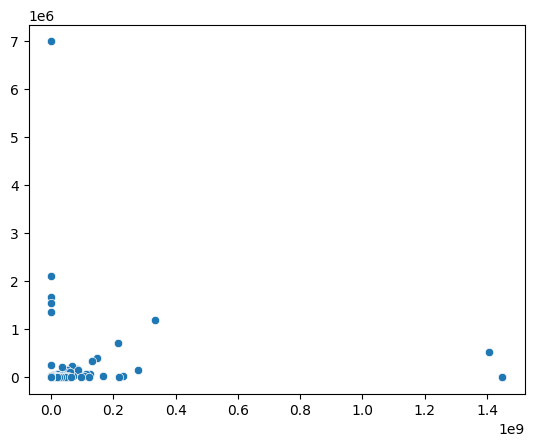

In [424]:
sns.scatterplot(x= population_ , y = totaldeaths_)

In [425]:
#splitting data using the train_test_split function in sklearn
X_train_population, X_test_population, Y_train_deaths , Y_test_deaths = train_test_split(population_ ,totaldeaths_, test_size = 0.2 , random_state=42)

In [426]:
#initializing the model
linear_regressor = LinearRegression()

In [427]:
#removing scientic notation and nan from Y_train_population  
np.set_printoptions(suppress = True, formatter = {'float_kind' : '{:0.2f}'.format})
Y_train_deaths = Y_train_deaths.astype('int64')
Y_train_deaths

C:\Users\toy\AppData\Local\Temp\ipykernel_7440\1773424756.py:3: RuntimeWarning: invalid value encountered in cast
  Y_train_deaths = Y_train_deaths.astype('int64')


array([                1427,                20283,                  194,
                        743,                  126,                  372,
                          8,                  468,                 1021,
                         38,                 7118,                  650,
                      16382,                  882,                 3632,
                      36043,                  225,                 2349,
                       1637,                12202,                 4390,
                         63,                  400,                 1102,
                      34376,                 1468,                 9646,
                       2570,                35934,                 9895,
                        163,                 5046,                 1232,
                      29423,                  189,                   13,
                        885,                   74,                24228,
                      14452,                58348, 

In [428]:
#fitting the model on the training data
linear_regressor.fit(X_train_population.reshape(-1,1),Y_train_deaths)

LinearRegression()

In [429]:
#predicitng y values using new input that is the X_test_population
y_value_predictionPOP = linear_regressor.predict(X_test_population.reshape(-1,1))
y_value_predictionPOP

array([-200730140877965760.00, -165749677622764288.00,
       -200705695152916512.00, -193776457925312576.00,
       -203612534782275456.00, -203584291768949280.00,
       -195899267214152768.00, -202183069972220352.00,
       -159622532701598304.00, -194961636078020736.00,
       -191026513387620736.00, -202195318741874528.00,
       -201764092600759488.00, -203746717654018752.00,
       -203698151633828448.00, -203802808256061984.00,
       -203349308649685184.00, -189861368566737408.00,
       -203799152169216352.00, -195345403690858336.00,
       -203715535166261184.00, -119222997888938736.00,
       -203802808256061984.00, -200976961585892032.00,
       -203600553871130432.00, -203799480629198176.00,
       -177876899509250656.00, -203741528349914816.00,
       -203802808256061984.00, -200987212627999936.00,
       -202189599174884832.00, -203797283522806880.00,
       -190715277253351840.00, -200282313872437376.00,
       -177737255232791168.00, -202455345419715680.00,
       -20

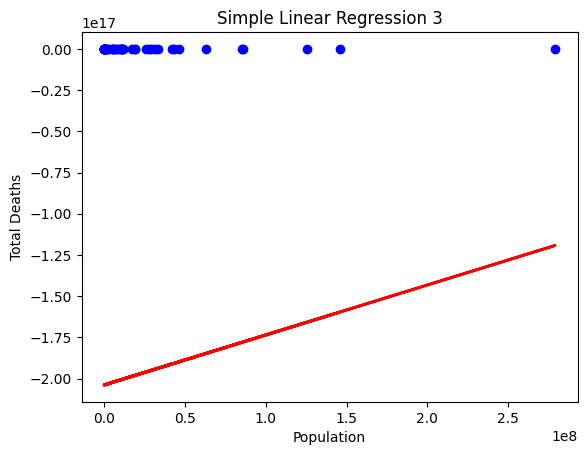

In [430]:
plt.scatter (X_test_population, Y_test_deaths, color ='blue')
plt.plot(X_test_population,y_value_predictionPOP , color='red' , linewidth=2)
plt.xlabel('Population') #independent variable
plt.ylabel('Total Deaths') #dependent varaiable
plt.title('Simple Linear Regression 3')
plt.show()

To predict between Total Deaths and Population during the covid era , it can be said that the death rate was negatively worse at -2.00, the death rate reduces from -2.00 to about -1.25  as the population rate increases to about 2.5M across the world  

In [431]:
np.set_printoptions(suppress = True, formatter = {'float_kind' : '{:0.2f}'.format})
Y_test_deaths = Y_test_deaths.astype('int64')
Y_test_deaths

C:\Users\toy\AppData\Local\Temp\ipykernel_7440\1061479158.py:2: RuntimeWarning: invalid value encountered in cast
  Y_test_deaths = Y_test_deaths.astype('int64')


array([               28093,                74694,                11165,
                       2250,                 2845,                  199,
                        312,                 5404,               402264,
                       1426,                25375,                  295,
                       2991,                  410,                  229,
                          2,                  183,               130733,
                          1,                 1974,                  648,
                     162033,              1365551,                12707,
                        123,                    8,               102174,
                         31,               258884,                  670,
                       4628,                   10,               112418,
                        147,               146799,                 8726,
                         40,                13848,                 1365,
                       2159, -9223372036854775808, 

In [432]:
#evaluating the model
#assessing model's performance using metrics like Mean Squared Error (MSE) and R-Squared (R2) on the test data
#the R-squared value measures how well the linear regression model fits the data, ranging from 0 to 1 , where 1 indicates a perfect fit
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(Y_test_deaths,y_value_predictionPOP)
r2 = r2_score (Y_test_deaths, y_value_predictionPOP)
print(f'Mean Squared Error: {mse}')
print(f'R-Sqaured (R2) : {r2}')   

Mean Squared Error: 1.732615419566928e+36
R-Sqaured (R2) : 0.001593641361083753


CONCLUSION ON REGRESSION ANALYSIS

Predicted circumstances where in this section . The increase and decrease of deaths, cases and population based on the covid infections .
In simple linear regression 1 , the prediction were made between Total Cases and Total Deaths
In simple linear regression 2 , the prediction were made between Test/1M pop and Deaths/1M pop
In simple linear regression 3 , the prediction were made between Population and Total Deaths